## Using the cosine similarity result, perform MSE on the remaining elements

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_rows = 100
pd.options.display.max_colwidth = None
import pickle
from tqdm import tqdm
import seaborn as sns
import os, sys, gc, random, itertools, math, pickle
from itertools import combinations
import networkx as nx


In [56]:
authid_12 = np.load('/disks/qnap3/users/21-tomokiyo/masters_thesis/data/guideline_paper/member_data/2021/A1.2_who_guideline_development_group.npy')
authid_13 = np.load('/disks/qnap3/users/21-tomokiyo/masters_thesis/data/guideline_paper/member_data/A1.3_who_systematic_review_team_revise.npy')
authid_14 = np.load('/disks/qnap3/users/21-tomokiyo/masters_thesis/data/guideline_paper/member_data/2021/A1.4_who_external_methodologists.npy')
authid_15 = np.load('//disks/qnap3/users/21-tomokiyo/masters_thesis/data/guideline_paper/member_data/A1.5_who_external_review_team_revise.npy')

boradmember_authid = list(authid_12)+list(authid_13)+list(authid_14)+list(authid_15)

authid_list1 = [35780677200 if x == 7006806977 else 57206422848 if x == 54791745100  else 57219144066 if x == 55588756600  else 57219144066 if x == 57191727610  else 57219144066 if x == 14037485900 else x for x in boradmember_authid]
treatment_authids = list(set(authid_list1))

In [99]:
candidate_feature_value = pd.read_pickle('/disks/qnap3/users/21-tomokiyo/masters_thesis/data/guideline_paper/all_guideline_matching/candidate_feature_value.pickle')



In [80]:
candidate_feature_value

paper_num_2015  academic_citation_2011  academic_citation_2012  \
authids                                                                       
11140076200            38.0                   836.0                  1017.0   
8858824900             32.0                   168.0                   221.0   
55835033800             4.0                     0.0                     0.0   
21743832000            27.0                   172.0                   243.0   
36642045300            50.0                   120.0                   260.0   
...                     ...                     ...                     ...   
23487676500           114.0                  1316.0                  1586.0   
23487806800            53.0                   240.0                   372.0   
56371163300            93.0                   908.0                  1130.0   
26038010700            12.0                    37.0                    39.0   
55029191900            13.0                     0.0                     1.0   

             academic_citation_2013  academic_citation_2014  \
authids                                                       
11140076200                  1196.0                  1360.0   
8858824900                    287.0                   335.0   
55835033800                     1.0                    10.0   
21743832000                   314.0                   365.0   
36642045300                   399.0                   565.0   
...                             ...                     ...   
23487676500                  1918.0                  2439.0   
23487806800                   534.0                   734.0   
56371163300                  1367.0                  1657.0   
26038010700                    45.0                    55.0   
55029191900                     7.0                    28.0   

             academic_citation_2015  academic_citation_2016  \
authids                                                       
11140076200                  1580.0                  1831.0   
8858824900                    407.0                   480.0   
55835033800                    20.0                    40.0   
21743832000                   451.0                   511.0   
36642045300                   756.0                  1063.0   
...                             ...                     ...   
23487676500                  3107.0                  4067.0   
23487806800                   997.0                  1380.0   
56371163300                  1972.0                  2306.0   
26038010700                    78.0                    92.0   
55029191900                    53.0                    91.0   

             academic_citation_2017  academic_citation_2018  \
authids                                                       
11140076200                  2080.0                  2407.0   
8858824900                    572.0                   663.0   
55835033800                    57.0                    76.0   
21743832000                   564.0                   623.0   
36642045300                  1361.0                  1686.0   
...                             ...                     ...   
23487676500                  5075.0                  6527.0   
23487806800                  1738.0                  2112.0   
56371163300                  2693.0                  3141.0   
26038010700                   105.0                   120.0   
55029191900                   147.0                   213.0   

             academic_citation_2019  ...  academic_citation_2023  \
authids                              ...                           
11140076200                  2746.0  ...                  4309.0   
8858824900                    807.0  ...                  1638.0   
55835033800                    91.0  ...                   151.0   
21743832000                   666.0  ...                   846.0   
36642045300                  2075.0  ...                  3830.0   
...                             ...  ...         

In [6]:
top_k_similar_authids = np.load('/disks/qnap3/users/21-tomokiyo/masters_thesis/data/guideline_paper/all_guideline_matching/top_k_similar_authids.npy', allow_pickle=True)
top_k_similar_authids = top_k_similar_authids.item()

In [14]:
# top_k_similar_authidsの中にガイドライン研究者がいる場合は除く, 上位30人とかにする？

new_top_k_similar_authids_dict = {}

for index, top_similar_authid in zip(top_k_similar_authids.keys(), top_k_similar_authids.values()):
    tmp = []
    for authid in top_similar_authid:
        if authid not in treatment_authids:
            tmp.append(authid)
    new_top_k_similar_authids_dict[index] = tmp
            

In [16]:
for tmp in new_top_k_similar_authids_dict.values():
    print(len(tmp))

40
40
40
39
39
40
40
35
35
38
39
37
39
30
36
40
39
40
39
33
36
40
37
33
40
38
28
37
35
40
40
38
40
37
39
40
33
39
39
38
40
40
40
39
40
40
31
39
39
38
40
39
37
40
38
38
37
38
40
39
40
39
28
39
32
40
28
35
39
40
40
40
32
36
40
39
39
40
36
39
25
40
37
36
36
39
40
40
38
34
34
29
38
38
39
37
35
38
39
39
40


In [52]:
## 各要素上位20人に絞る
top_k_similar_authids_dict = {}

for index, top_similar_authid in zip(new_top_k_similar_authids_dict.keys(), new_top_k_similar_authids_dict.values()):
    tmp = []
    for authid in top_similar_authid:
        tmp.append(authid)
    top_k_similar_authids_dict[index] = tmp[:20]

In [53]:
for tmp in top_k_similar_authids_dict.values():
    print(len(tmp))

20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20


In [54]:
treatment_authids

[]

In [27]:
candidate_feature_value

paper_num_2015  academic_citation_2011  academic_citation_2012  \
authids                                                                       
11140076200            38.0                   836.0                  1017.0   
8858824900             32.0                   168.0                   221.0   
55835033800             4.0                     0.0                     0.0   
21743832000            27.0                   172.0                   243.0   
36642045300            50.0                   120.0                   260.0   
...                     ...                     ...                     ...   
23487676500           114.0                  1316.0                  1586.0   
23487806800            53.0                   240.0                   372.0   
56371163300            93.0                   908.0                  1130.0   
26038010700            12.0                    37.0                    39.0   
55029191900            13.0                     0.0                     1.0   

             academic_citation_2013  academic_citation_2014  \
authids                                                       
11140076200                  1196.0                  1360.0   
8858824900                    287.0                   335.0   
55835033800                     1.0                    10.0   
21743832000                   314.0                   365.0   
36642045300                   399.0                   565.0   
...                             ...                     ...   
23487676500                  1918.0                  2439.0   
23487806800                   534.0                   734.0   
56371163300                  1367.0                  1657.0   
26038010700                    45.0                    55.0   
55029191900                     7.0                    28.0   

             academic_citation_2015  academic_citation_2016  \
authids                                                       
11140076200                  1580.0                  1831.0   
8858824900                    407.0                   480.0   
55835033800                    20.0                    40.0   
21743832000                   451.0                   511.0   
36642045300                   756.0                  1063.0   
...                             ...                     ...   
23487676500                  3107.0                  4067.0   
23487806800                   997.0                  1380.0   
56371163300                  1972.0                  2306.0   
26038010700                    78.0                    92.0   
55029191900                    53.0                    91.0   

             academic_citation_2017  academic_citation_2018  \
authids                                                       
11140076200                  2080.0                  2407.0   
8858824900                    572.0                   663.0   
55835033800                    57.0                    76.0   
21743832000                   564.0                   623.0   
36642045300                  1361.0                  1686.0   
...                             ...                     ...   
23487676500                  5075.0                  6527.0   
23487806800                  1738.0                  2112.0   
56371163300                  2693.0                  3141.0   
26038010700                   105.0                   120.0   
55029191900                   147.0                   213.0   

             academic_citation_2019  ...  academic_citation_2021  \
authids                              ...                           
11140076200                  2746.0  ...                  3597.0   
8858824900                    807.0  ...                  1195.0   
55835033800                    91.0  ...                   120.0   
21743832000                   666.0  ...                   749.0   
36642045300                  2075.0  ...                  3039.0   
...                             ...  ...         

In [28]:
candidate_researcher

array([111831889600,  72533540600,  61794116099,  81150931900,
        62292244676,  61891908735, 110387418300,  63872566000,
        61793947459, 112381492838, 112398932254, 112396709986,
        63527837800,  91959210900, 110662098700,  90782624300,
       112378768526, 112392240934,  62197039363,  62392615762])

  0%|                                                   | 0/108 [00:00<?, ?it/s]

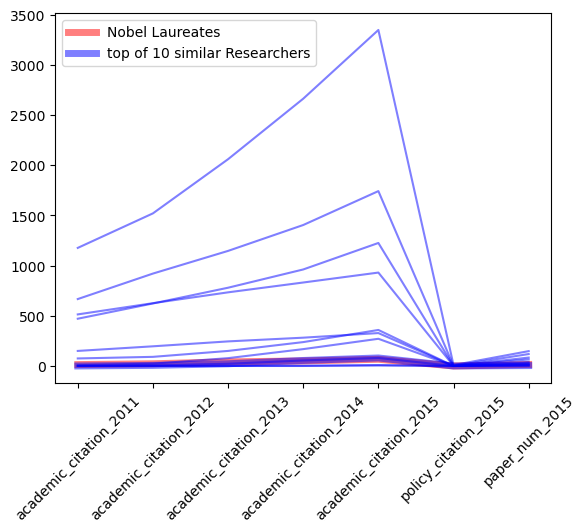

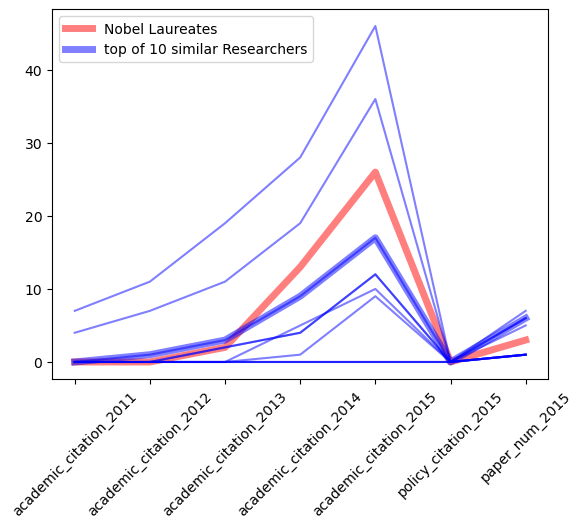

  2%|▊                                          | 2/108 [00:00<00:07, 13.30it/s]

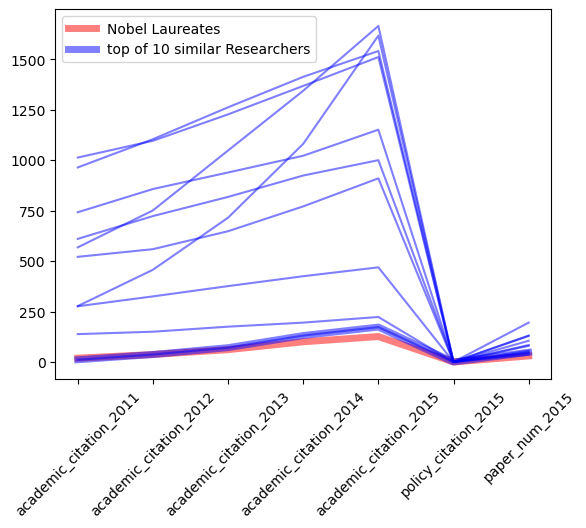

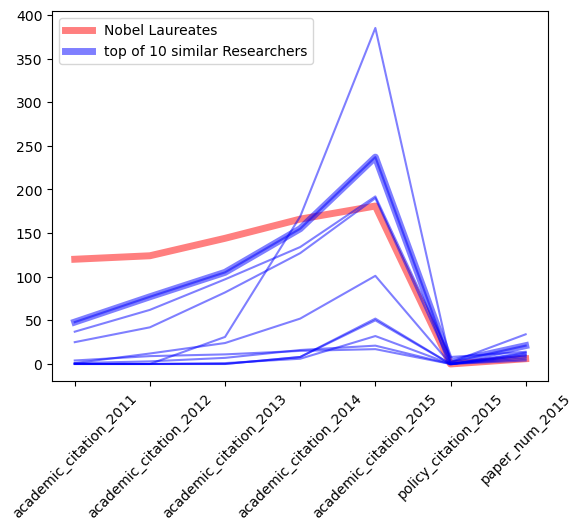

  4%|█▌                                         | 4/108 [00:00<00:07, 13.18it/s]

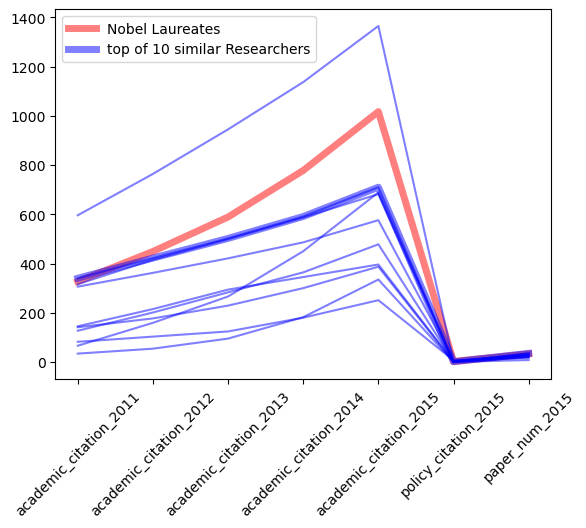

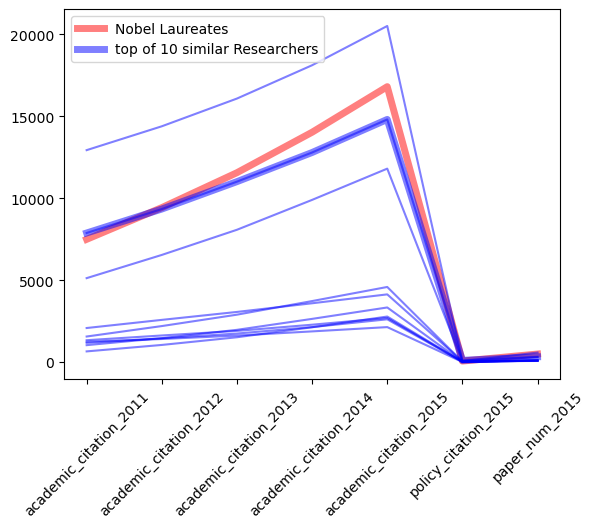

  6%|██▍                                        | 6/108 [00:00<00:07, 13.00it/s]

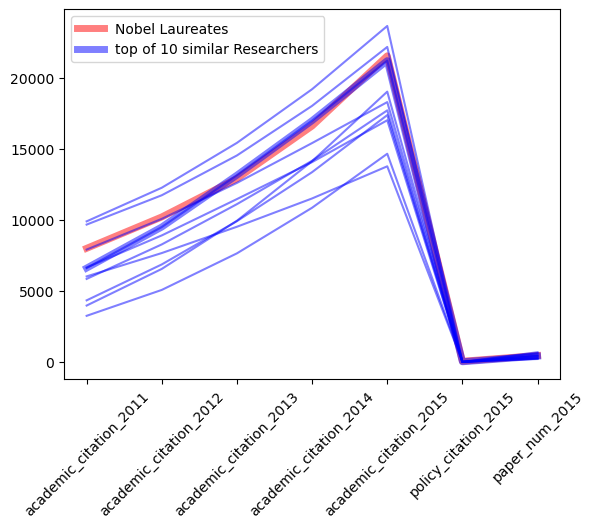

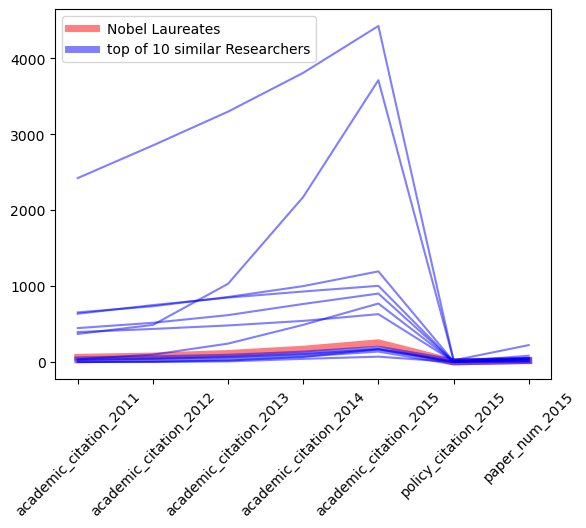

  7%|███▏                                       | 8/108 [00:00<00:07, 13.35it/s]

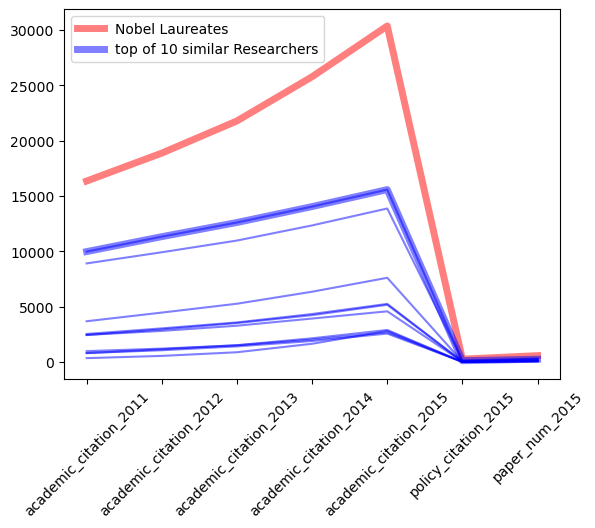

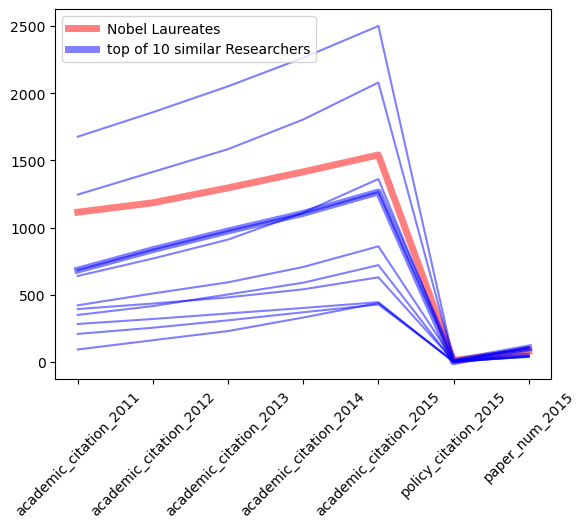

 10%|████▎                                     | 11/108 [00:00<00:06, 15.53it/s]

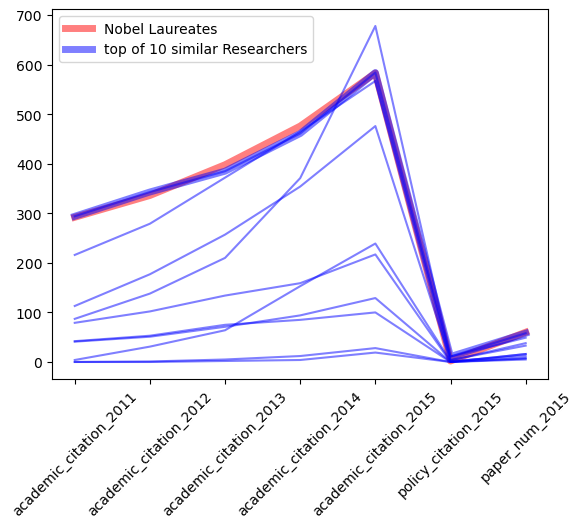

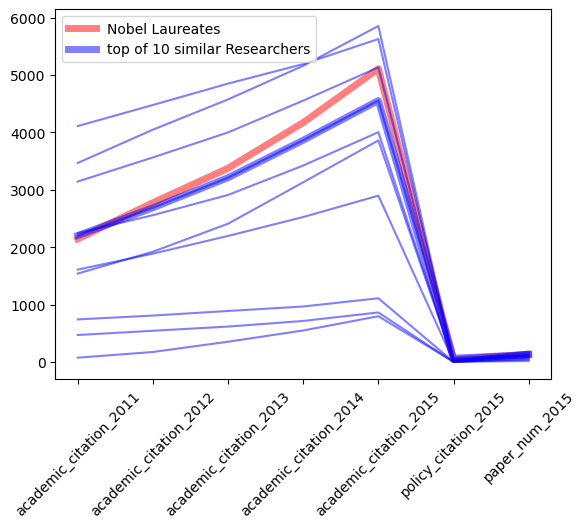

 12%|█████                                     | 13/108 [00:00<00:06, 14.50it/s]

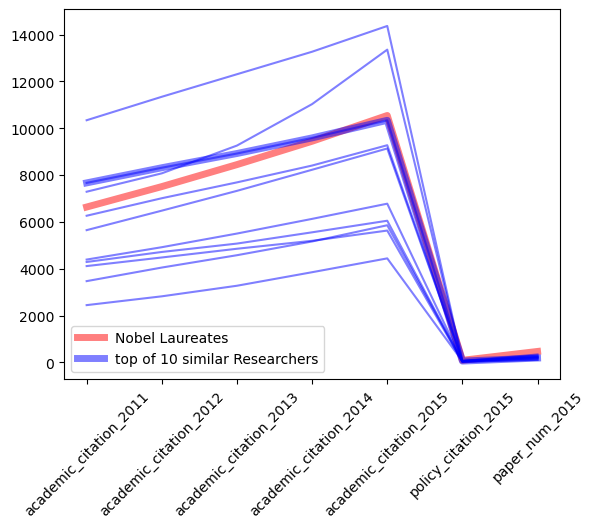

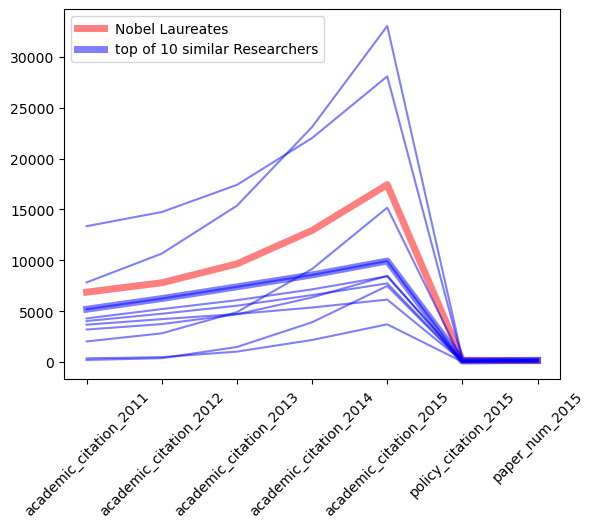

 14%|█████▊                                    | 15/108 [00:01<00:06, 14.00it/s]

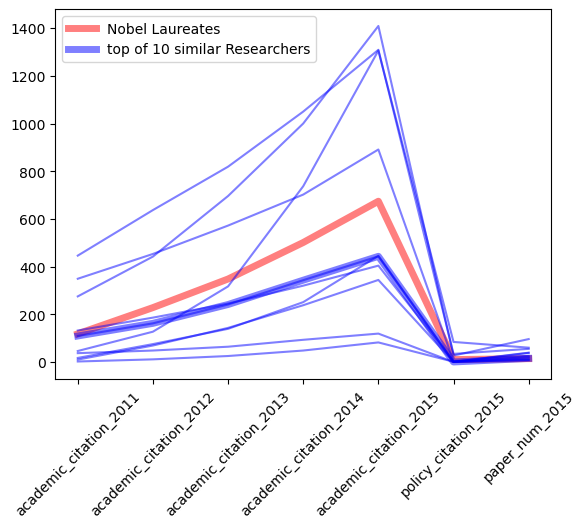

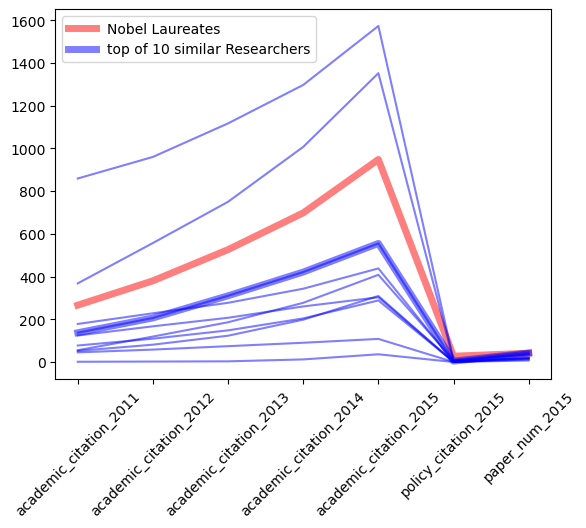

 16%|██████▌                                   | 17/108 [00:01<00:06, 13.60it/s]

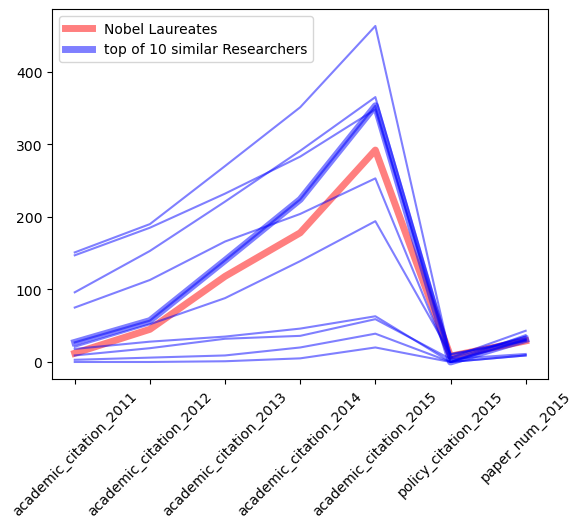

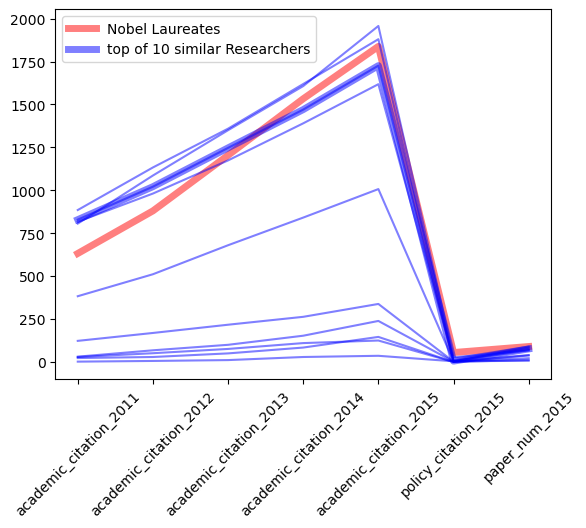

 18%|███████▍                                  | 19/108 [00:01<00:06, 13.51it/s]

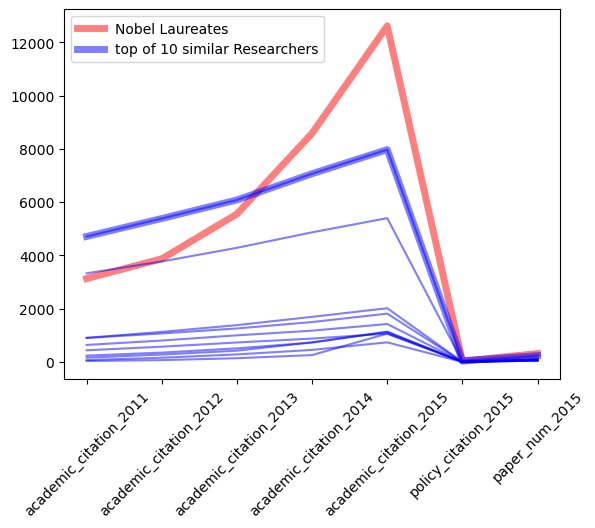

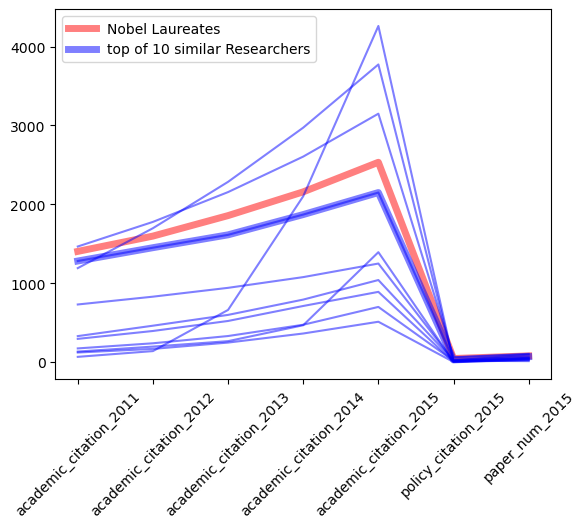

 19%|████████▏                                 | 21/108 [00:01<00:06, 13.55it/s]

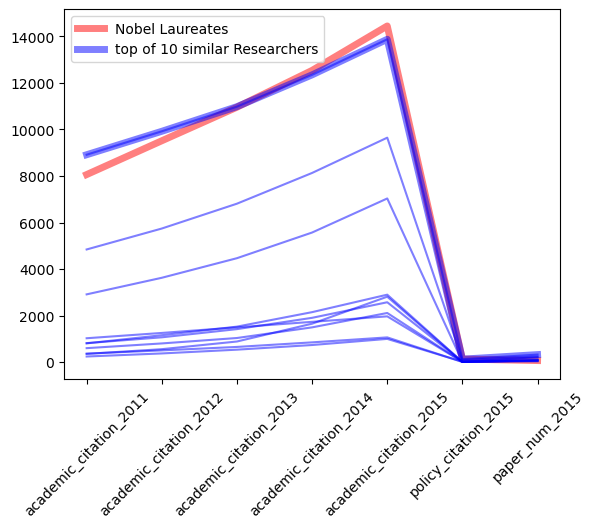

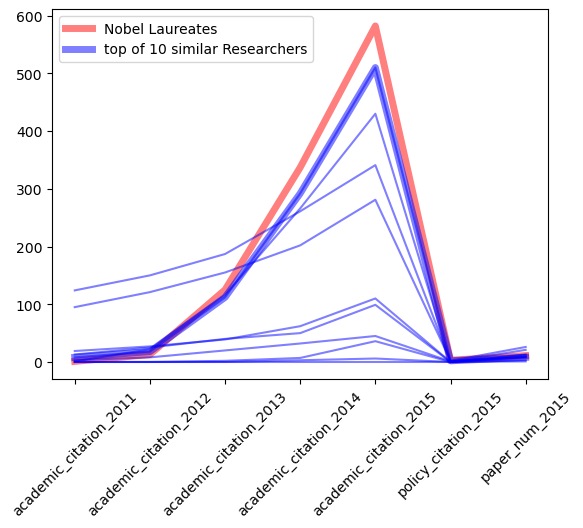

 21%|████████▉                                 | 23/108 [00:01<00:06, 13.45it/s]

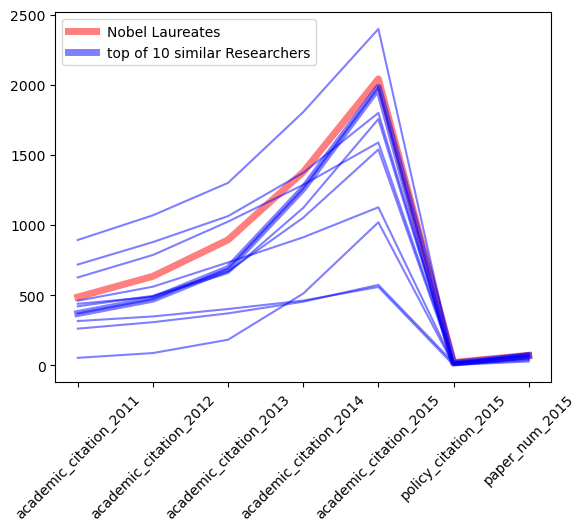

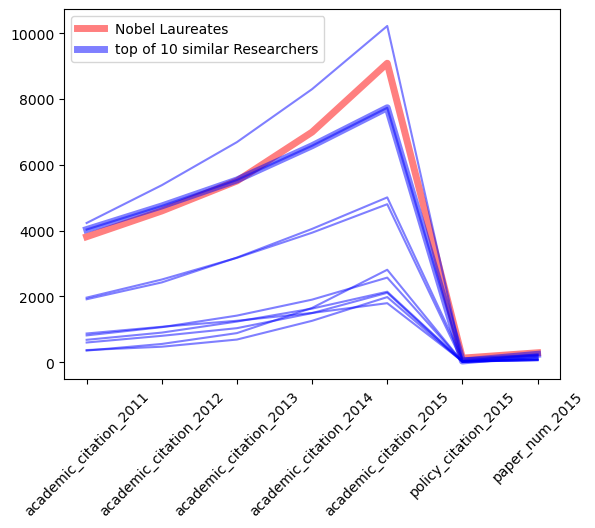

 23%|█████████▋                                | 25/108 [00:01<00:06, 13.47it/s]

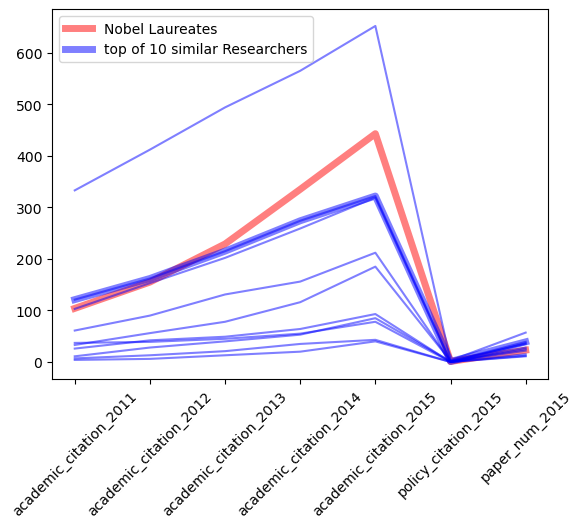

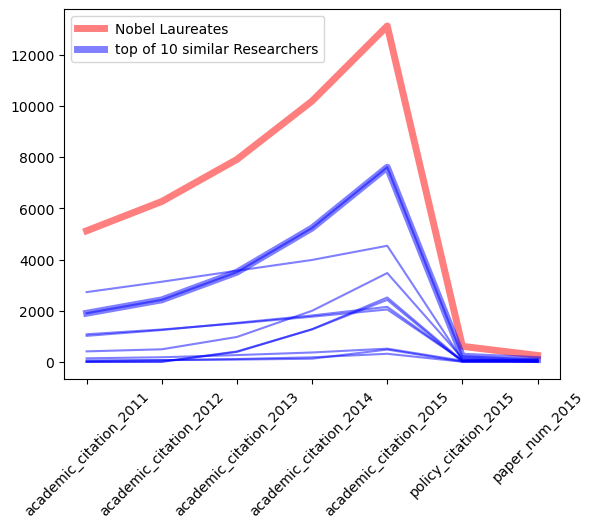

 25%|██████████▌                               | 27/108 [00:01<00:06, 13.44it/s]

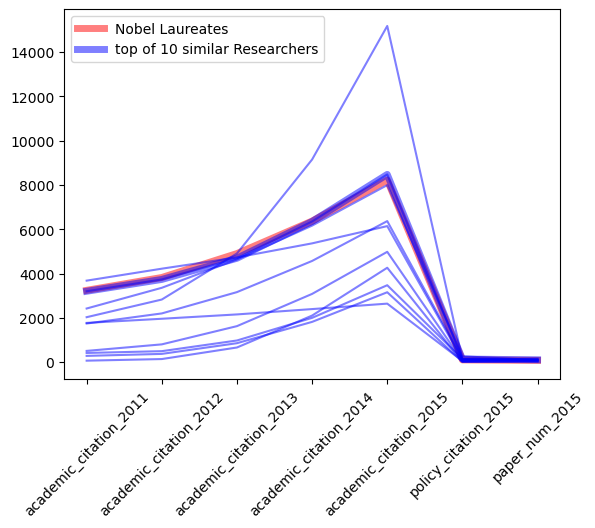

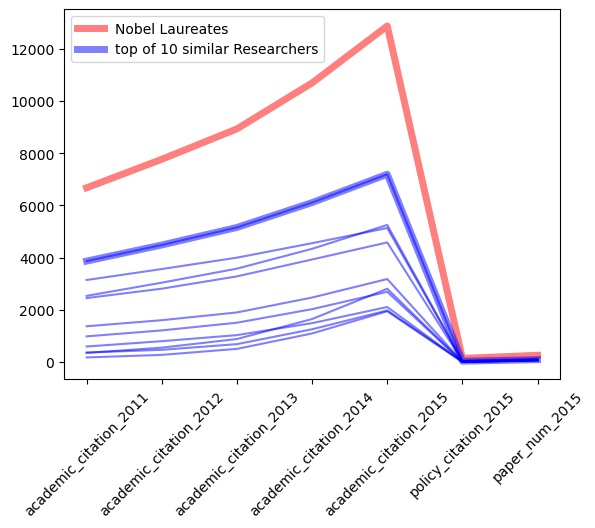

 28%|███████████▋                              | 30/108 [00:02<00:05, 15.31it/s]

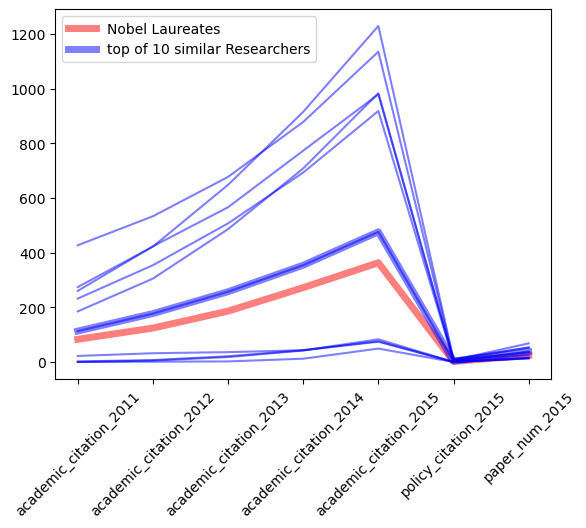

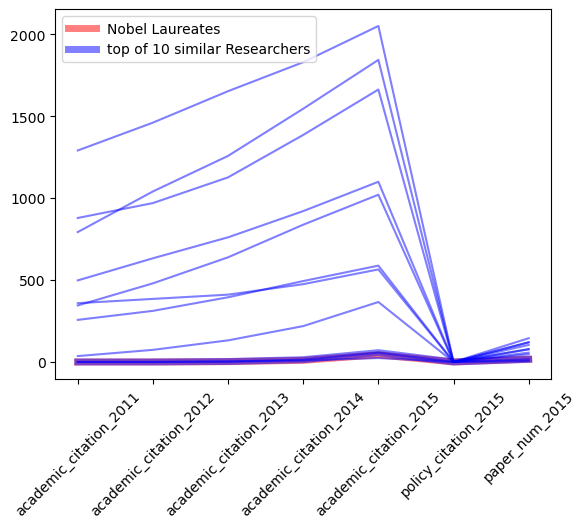

 30%|████████████▍                             | 32/108 [00:02<00:06, 11.59it/s]

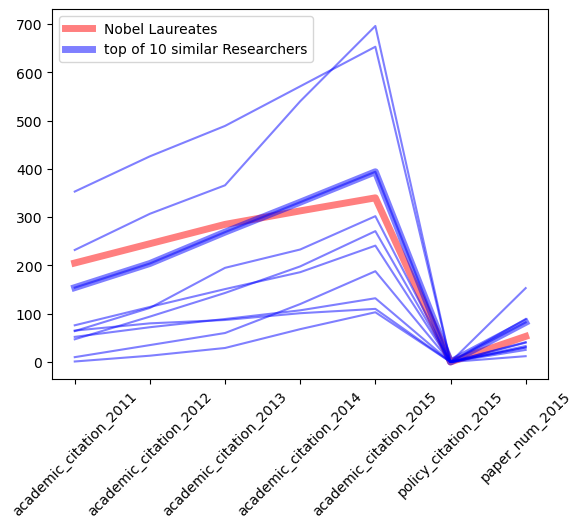

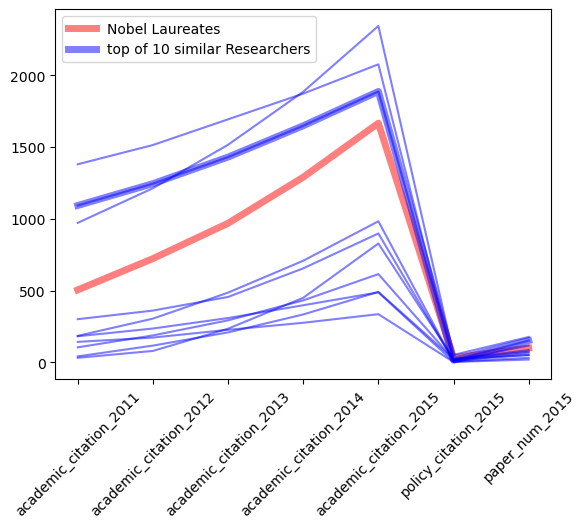

 31%|█████████████▏                            | 34/108 [00:02<00:06, 12.04it/s]

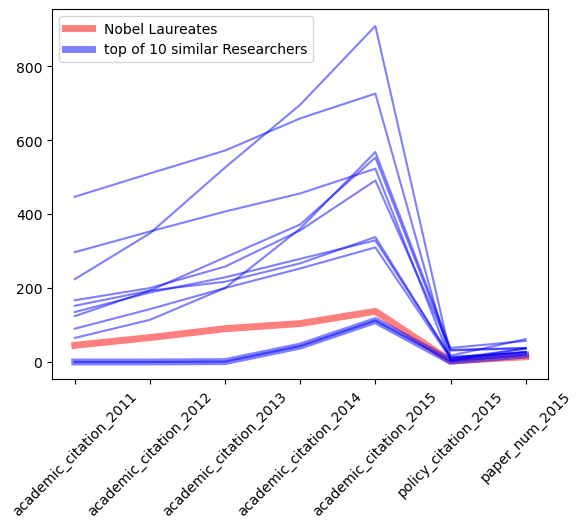

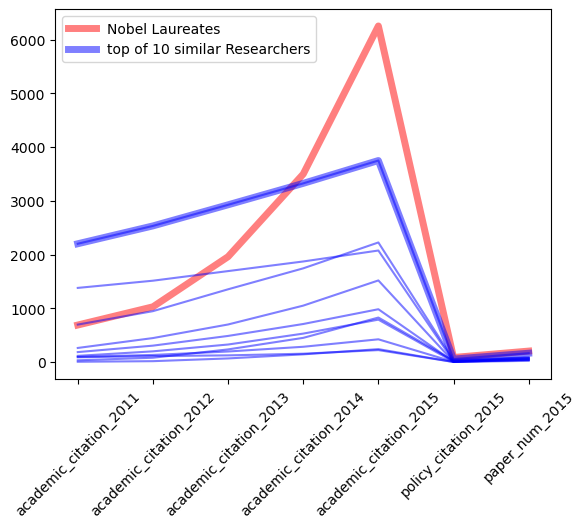

 33%|██████████████                            | 36/108 [00:02<00:05, 12.46it/s]

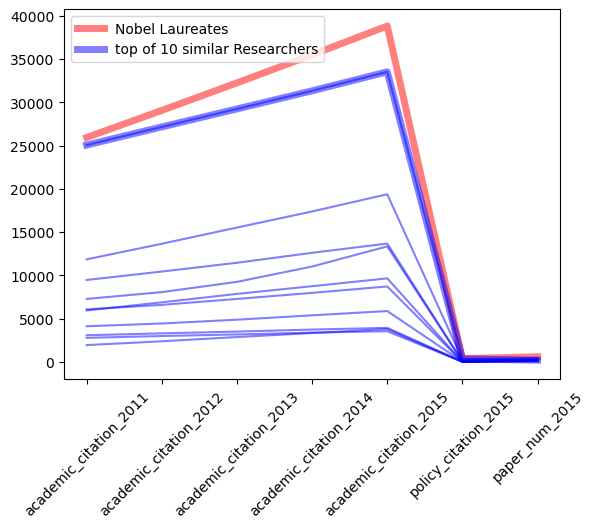

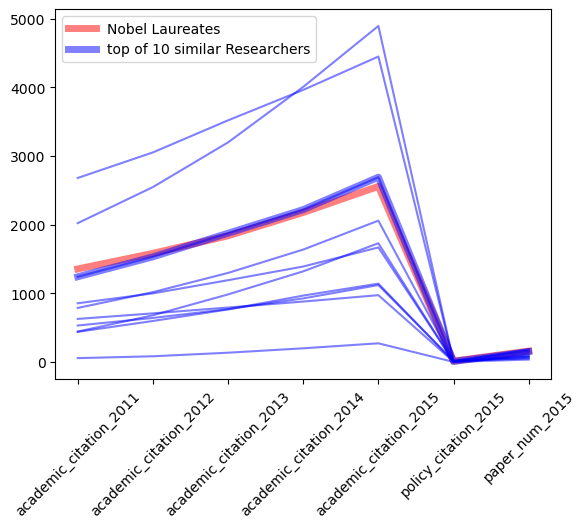

 35%|██████████████▊                           | 38/108 [00:02<00:05, 12.51it/s]

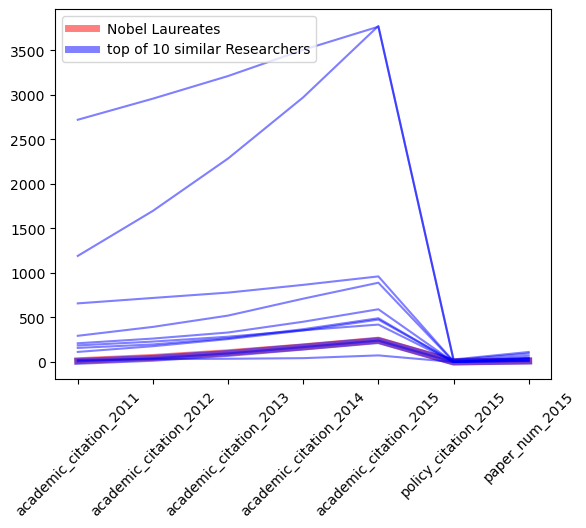

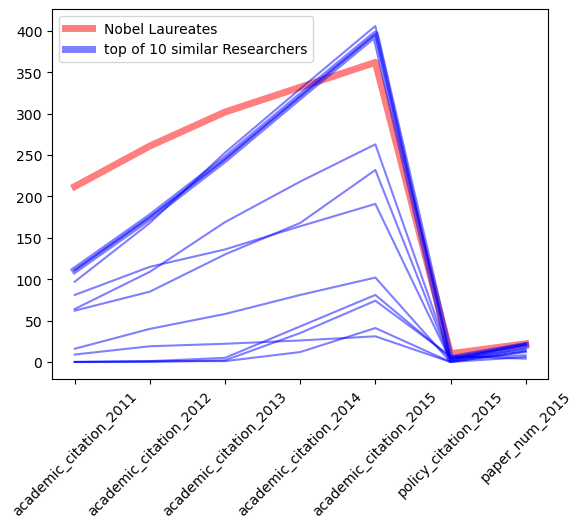

 38%|███████████████▉                          | 41/108 [00:03<00:04, 14.30it/s]

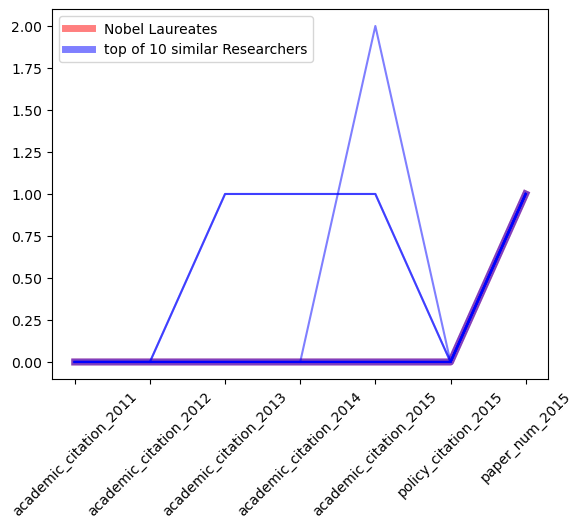

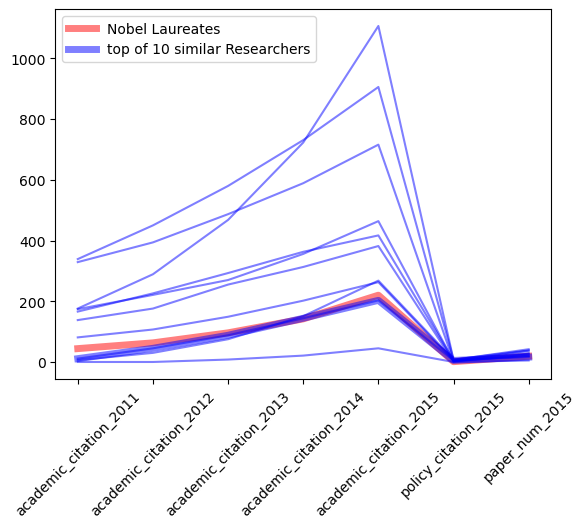

 41%|█████████████████                         | 44/108 [00:03<00:04, 15.90it/s]

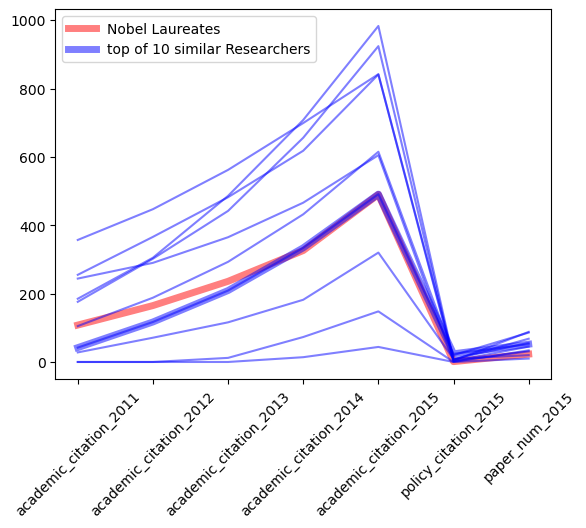

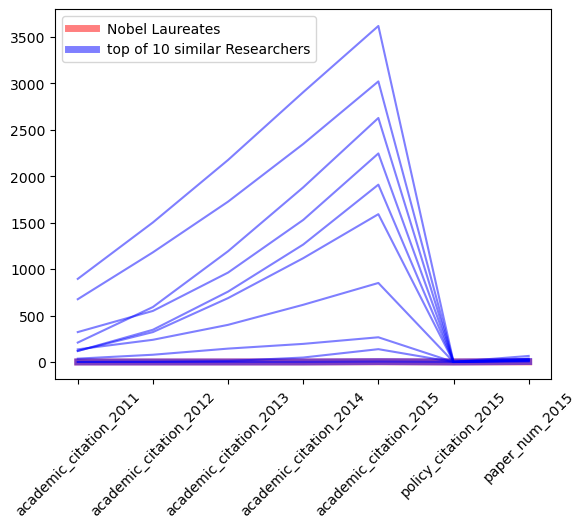

 43%|█████████████████▉                        | 46/108 [00:03<00:04, 15.15it/s]

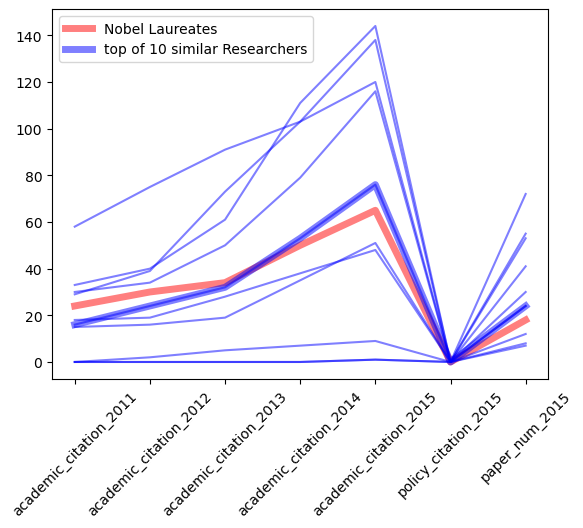

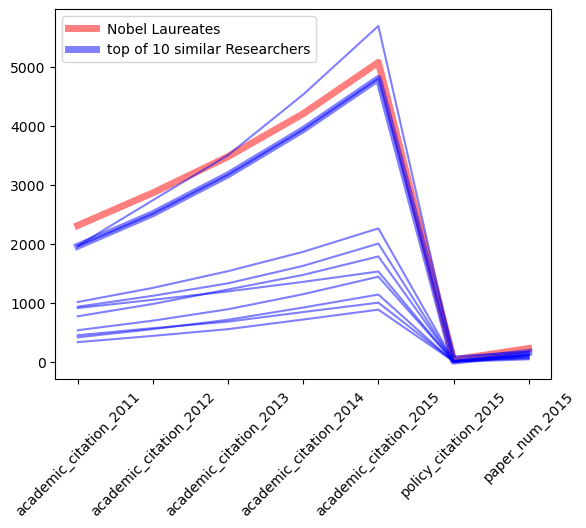

 44%|██████████████████▋                       | 48/108 [00:03<00:04, 14.61it/s]

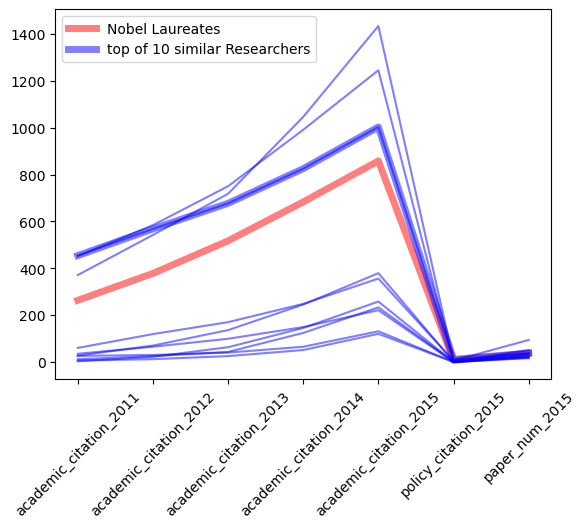

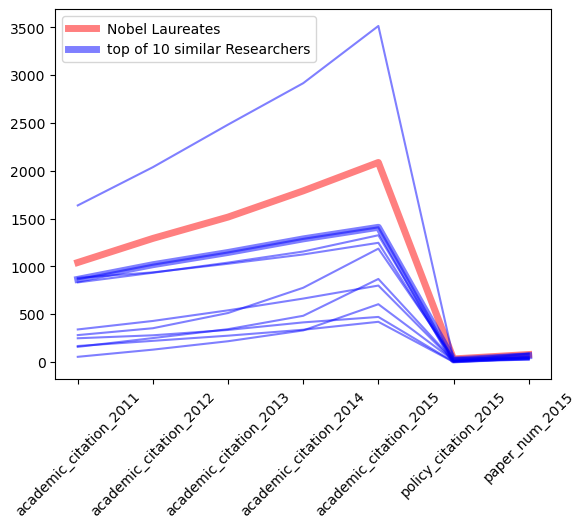

 46%|███████████████████▍                      | 50/108 [00:03<00:04, 14.17it/s]

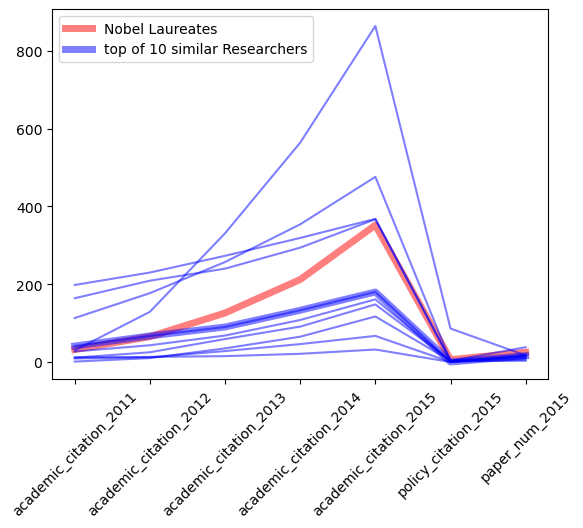

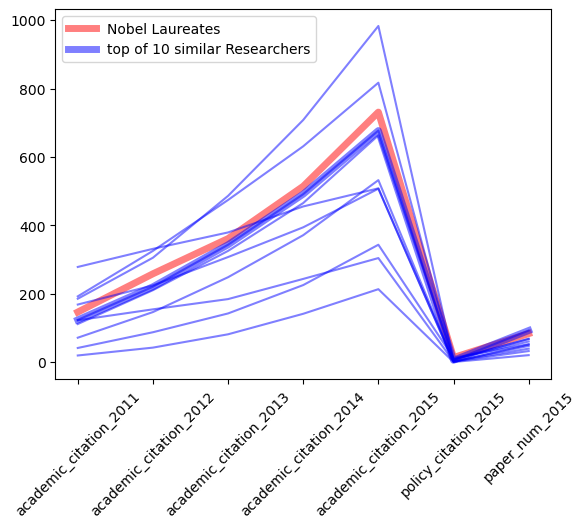

 48%|████████████████████▏                     | 52/108 [00:03<00:03, 14.05it/s]

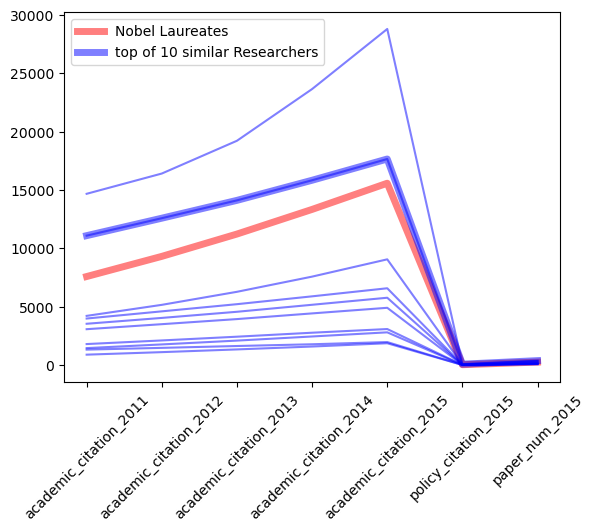

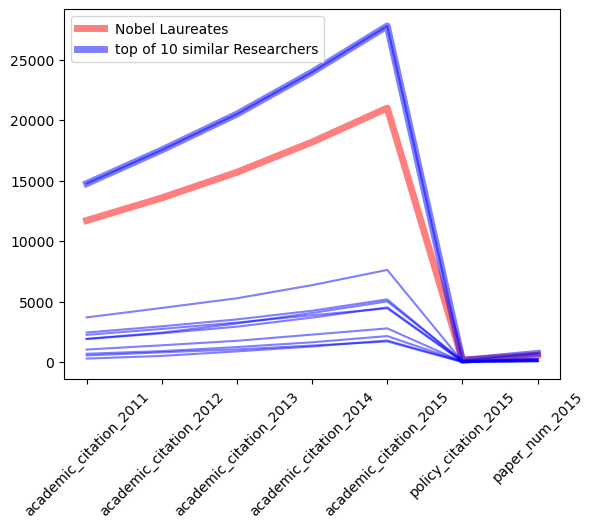

 50%|█████████████████████                     | 54/108 [00:03<00:03, 13.88it/s]

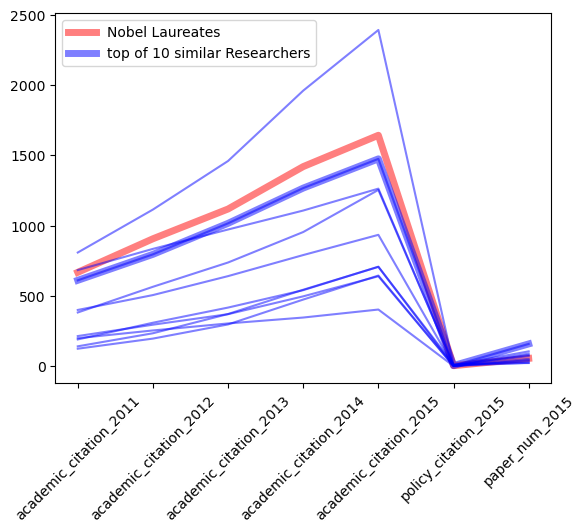

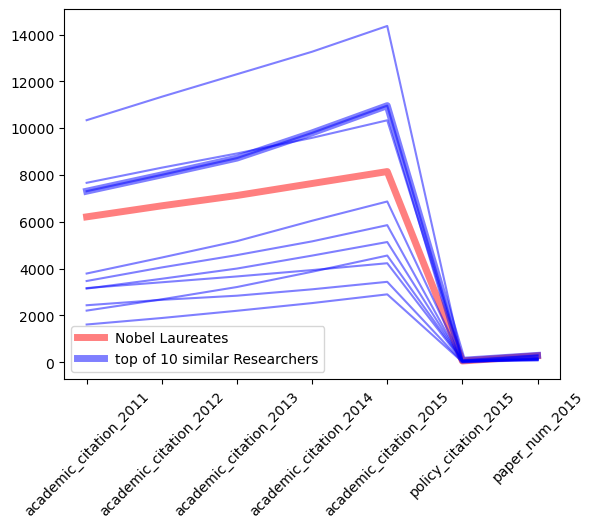

 52%|█████████████████████▊                    | 56/108 [00:04<00:03, 13.66it/s]

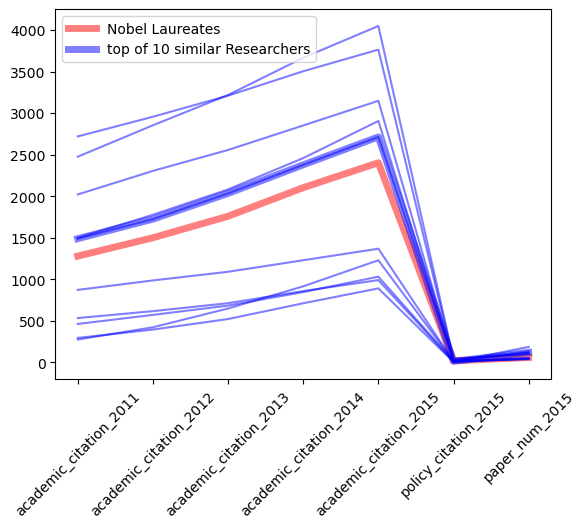

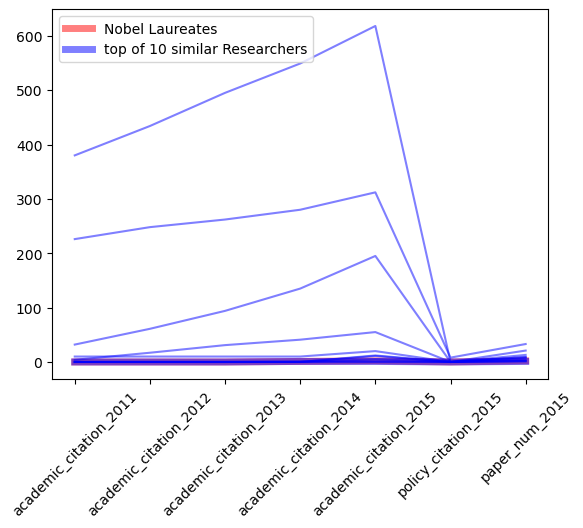

 54%|██████████████████████▌                   | 58/108 [00:04<00:03, 13.13it/s]

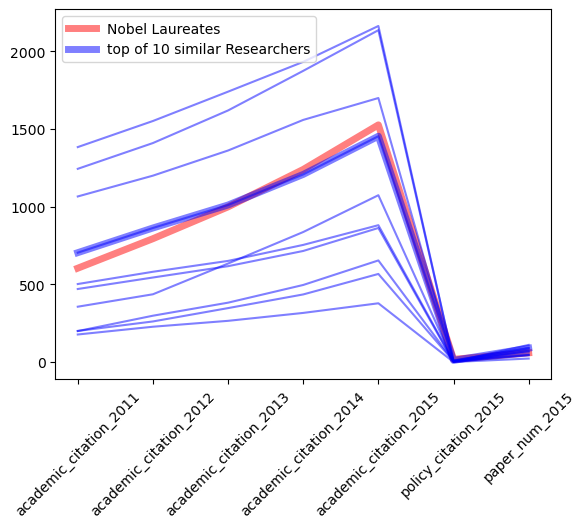

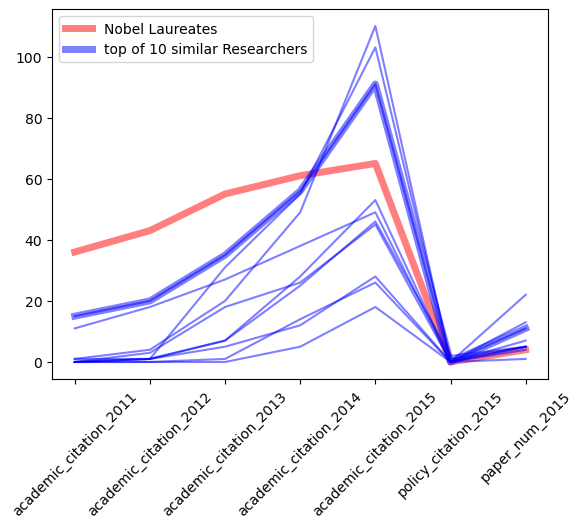

 56%|███████████████████████▎                  | 60/108 [00:04<00:03, 13.11it/s]

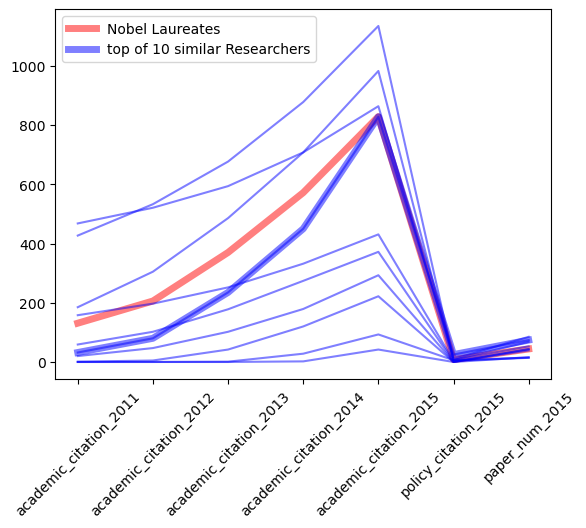

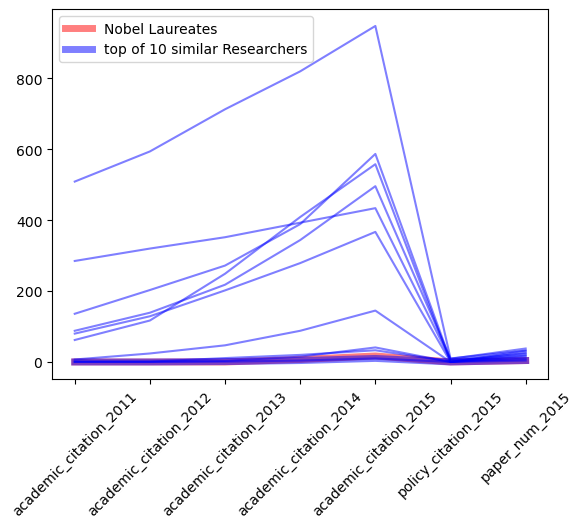

 57%|████████████████████████                  | 62/108 [00:04<00:03, 13.31it/s]

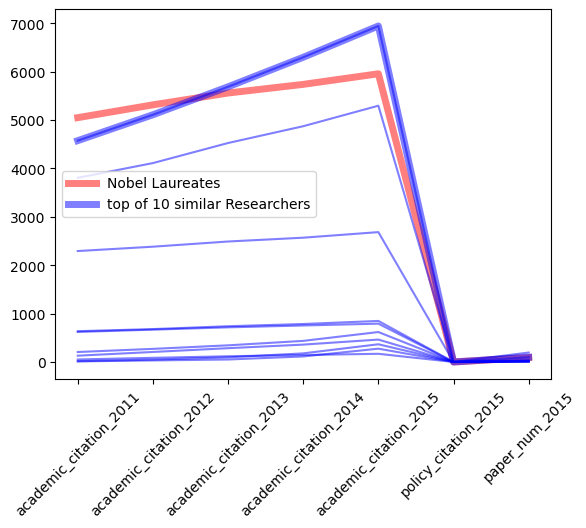

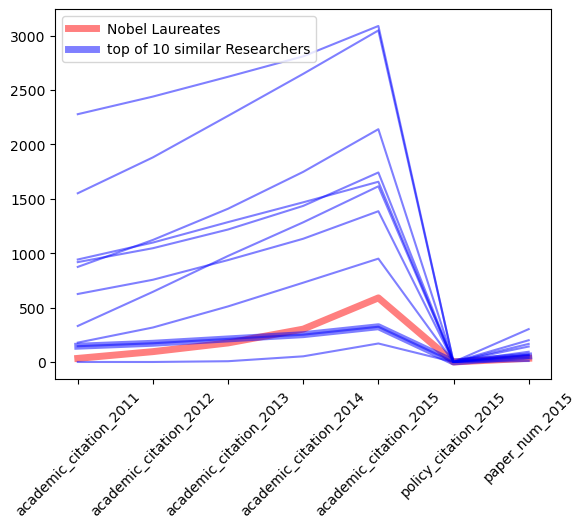

 59%|████████████████████████▉                 | 64/108 [00:04<00:03, 12.88it/s]

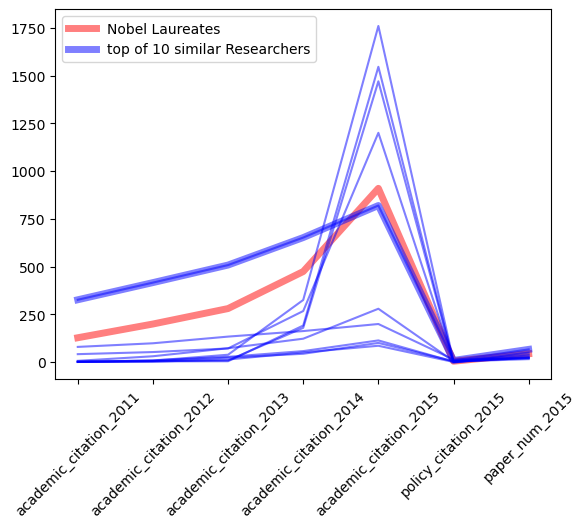

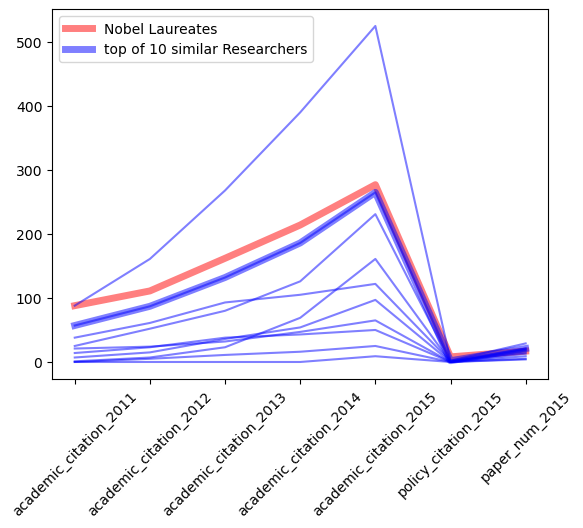

 61%|█████████████████████████▋                | 66/108 [00:04<00:03, 13.01it/s]

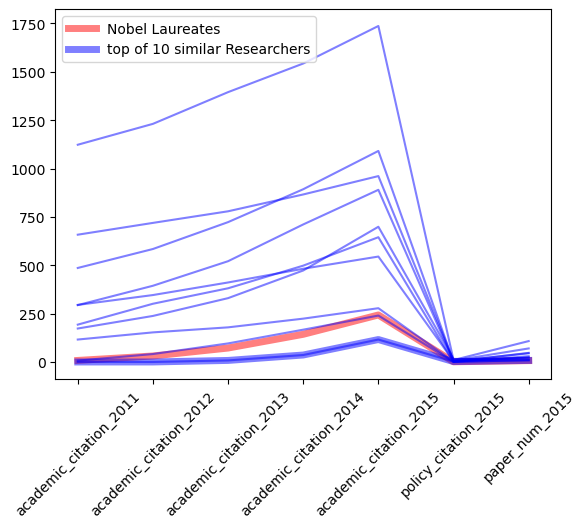

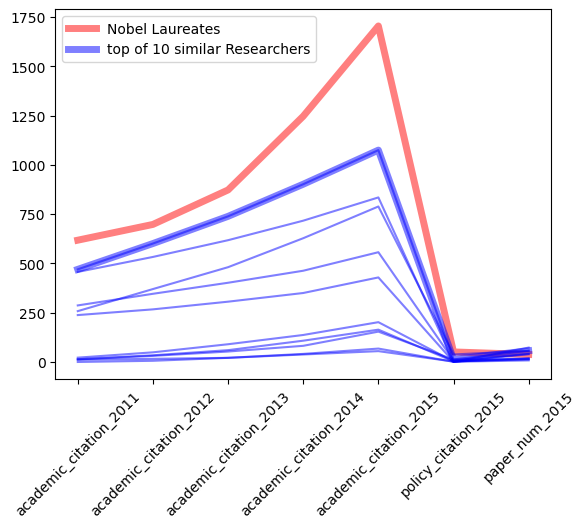

 63%|██████████████████████████▍               | 68/108 [00:05<00:03, 12.84it/s]

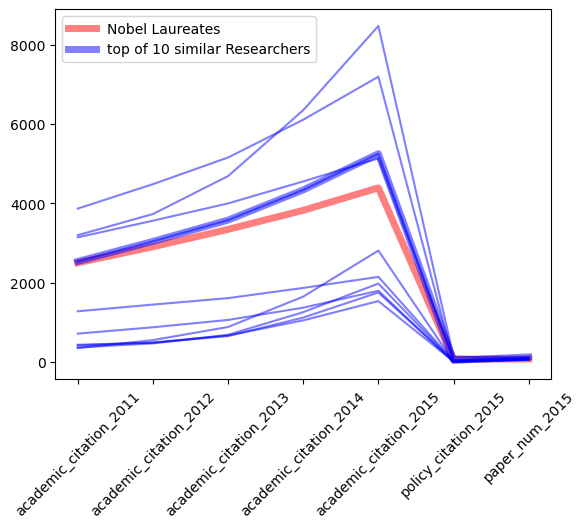

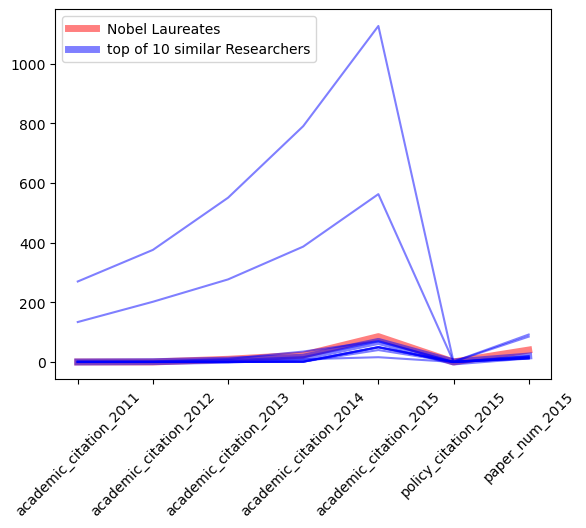

 65%|███████████████████████████▏              | 70/108 [00:05<00:02, 13.11it/s]

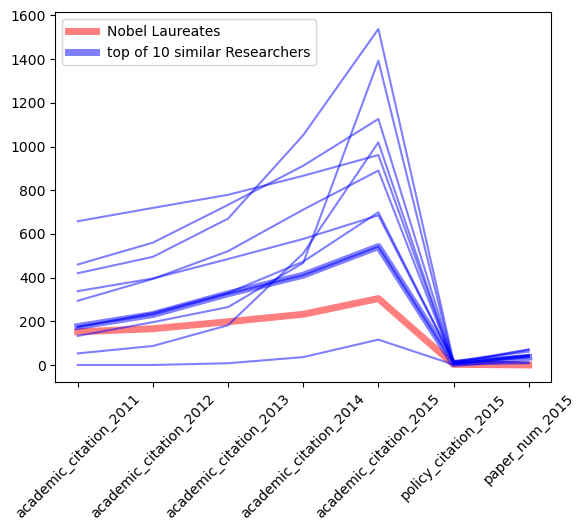

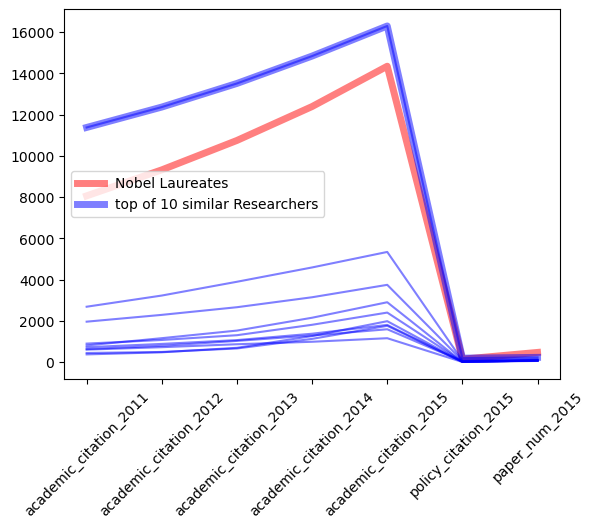

 67%|████████████████████████████              | 72/108 [00:05<00:03, 10.21it/s]

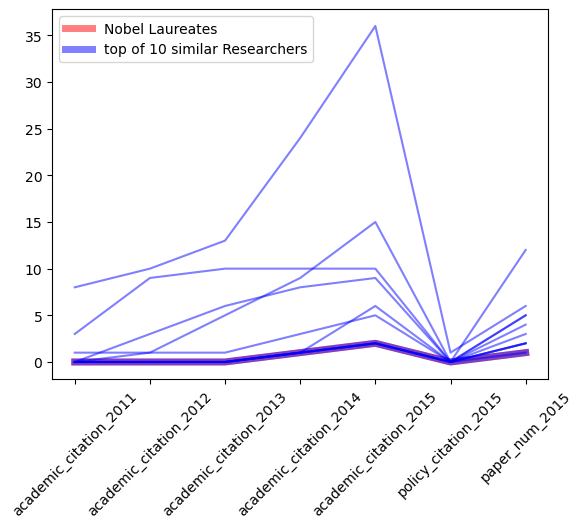

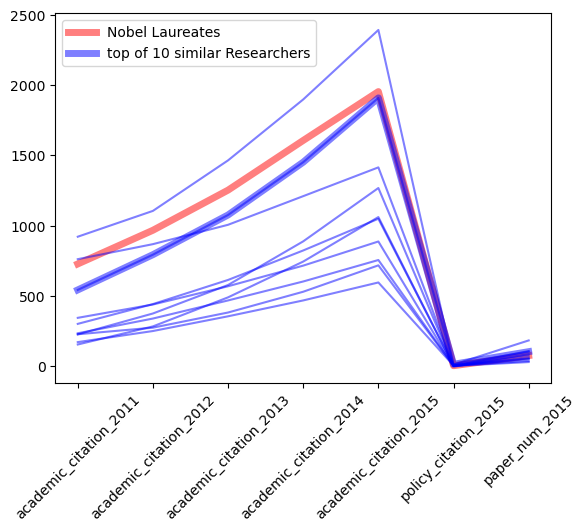

 69%|████████████████████████████▊             | 74/108 [00:05<00:03, 10.98it/s]

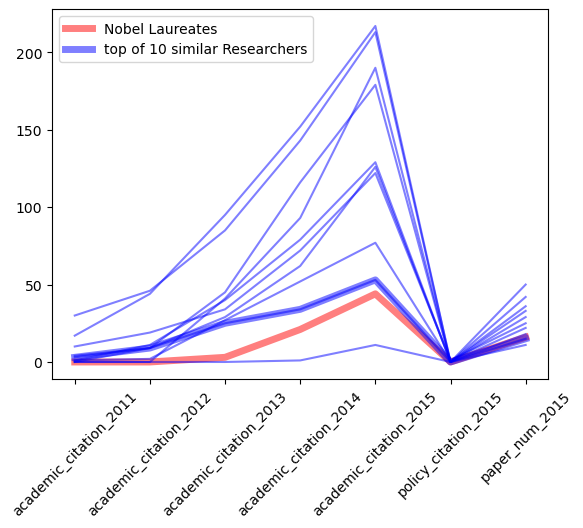

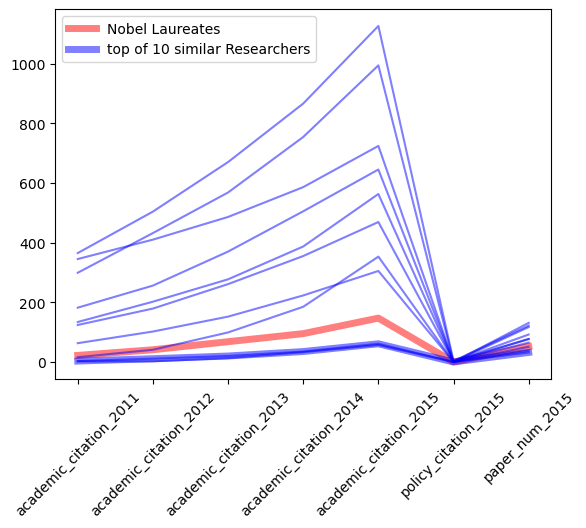

 70%|█████████████████████████████▌            | 76/108 [00:05<00:02, 11.67it/s]

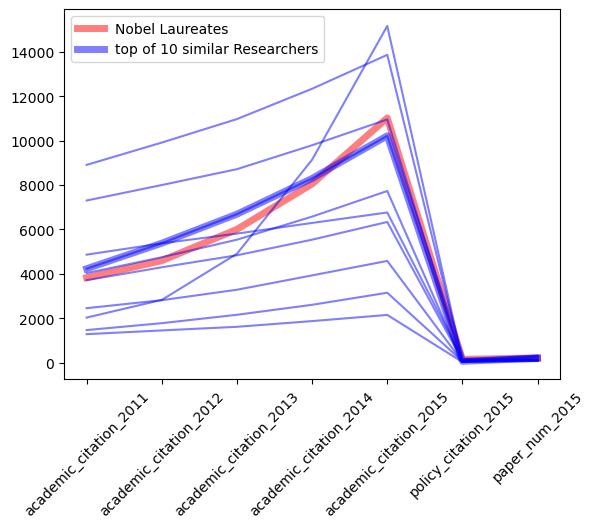

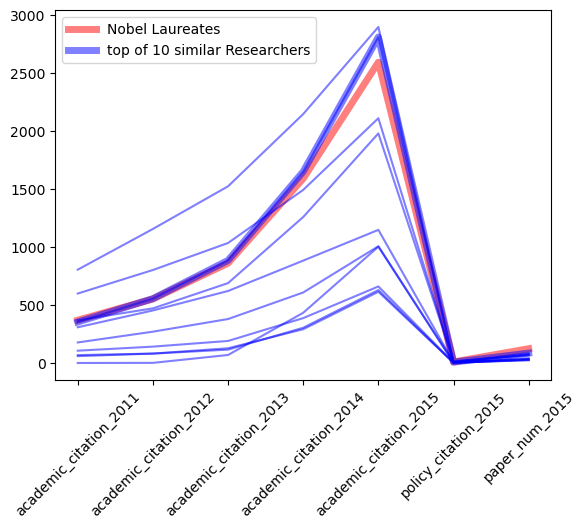

 72%|██████████████████████████████▎           | 78/108 [00:05<00:02, 12.06it/s]

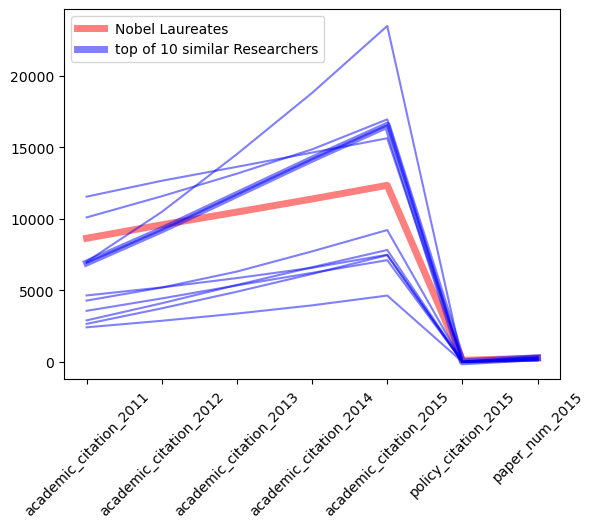

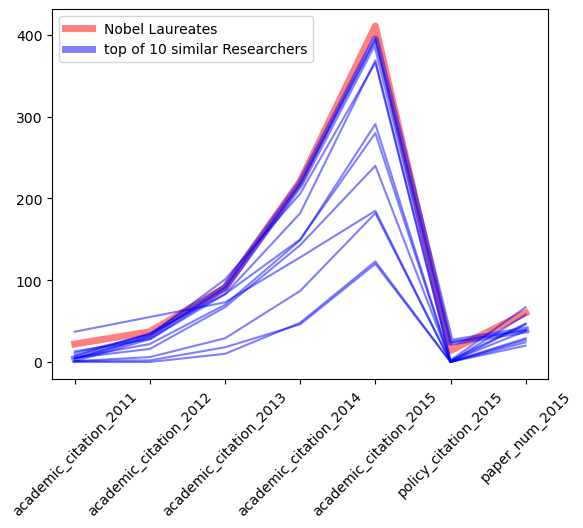

 74%|███████████████████████████████           | 80/108 [00:06<00:02, 12.54it/s]

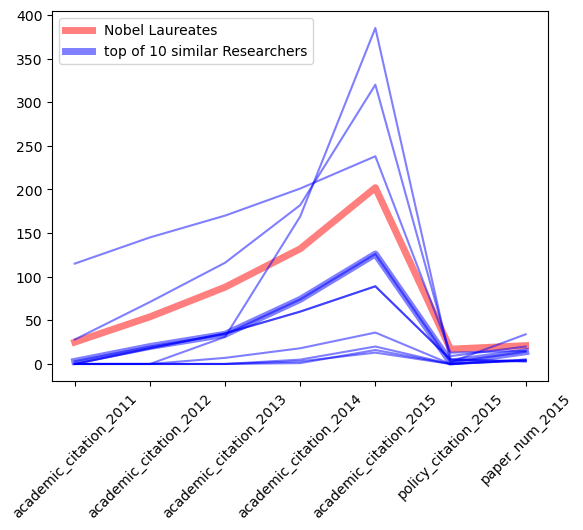

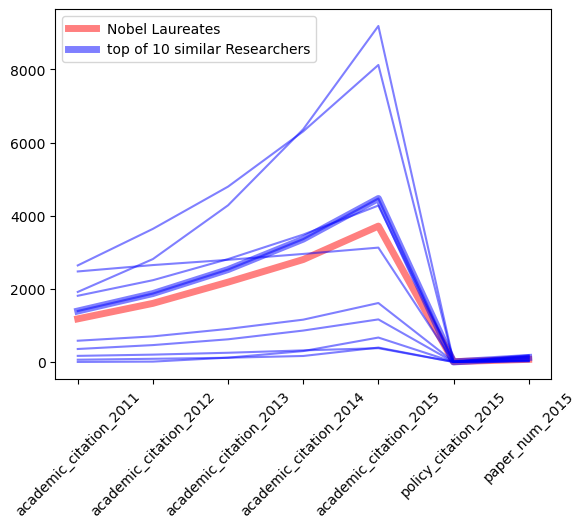

 76%|███████████████████████████████▉          | 82/108 [00:06<00:02, 12.78it/s]

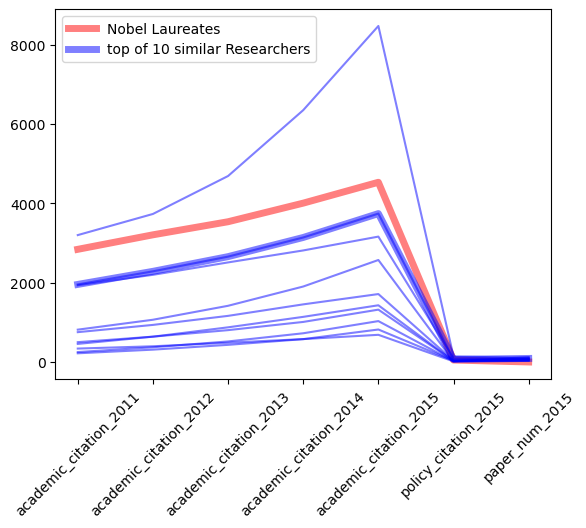

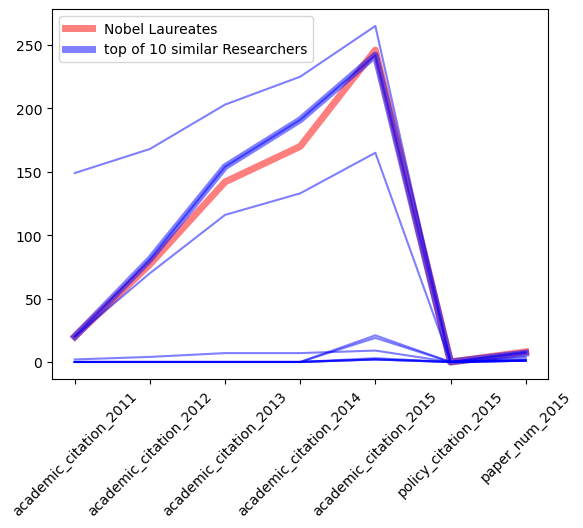

 79%|█████████████████████████████████         | 85/108 [00:06<00:01, 15.06it/s]

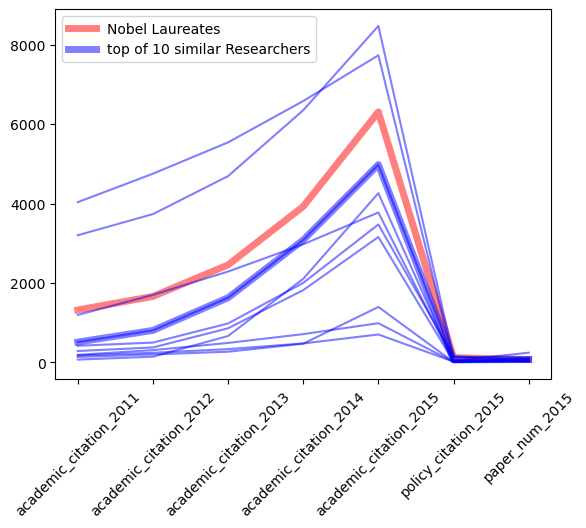

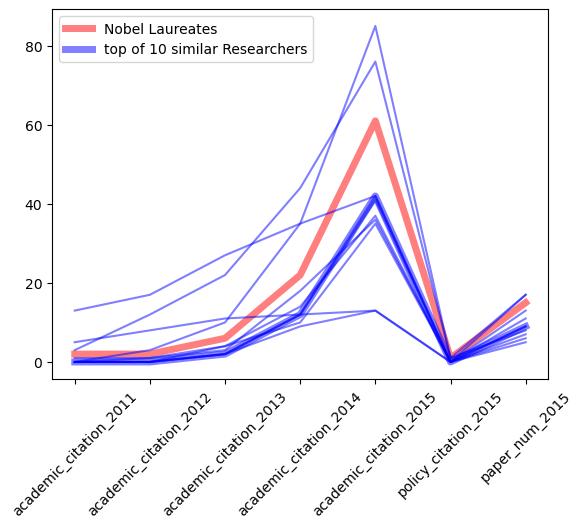

 81%|█████████████████████████████████▊        | 87/108 [00:06<00:01, 14.70it/s]

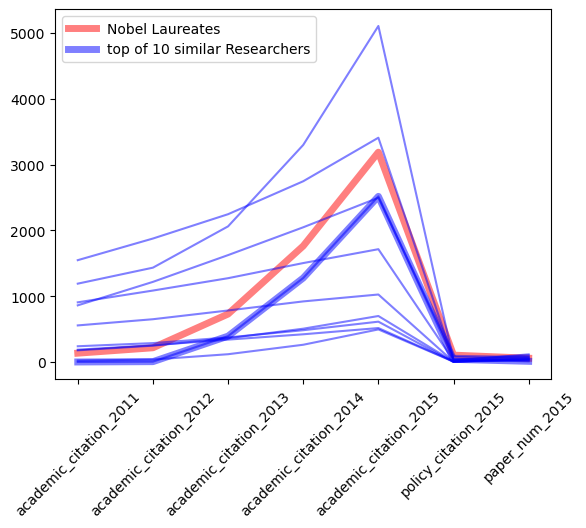

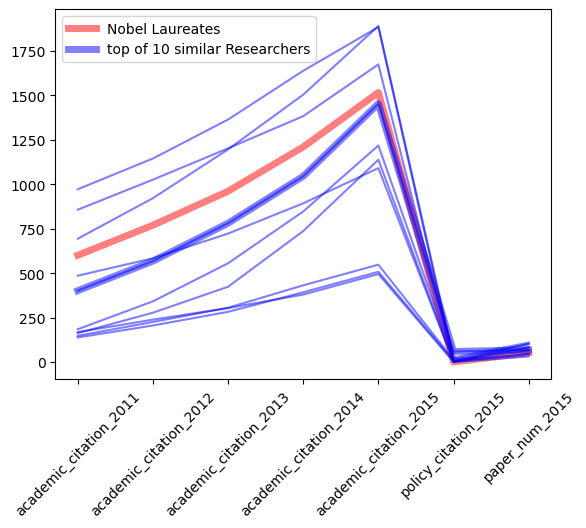

 83%|███████████████████████████████████       | 90/108 [00:06<00:01, 16.25it/s]

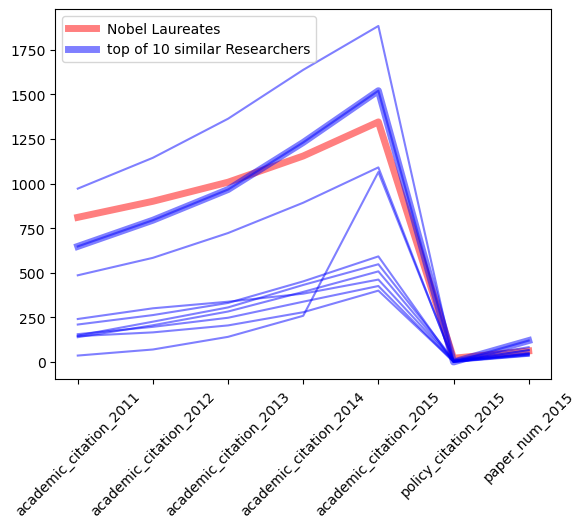

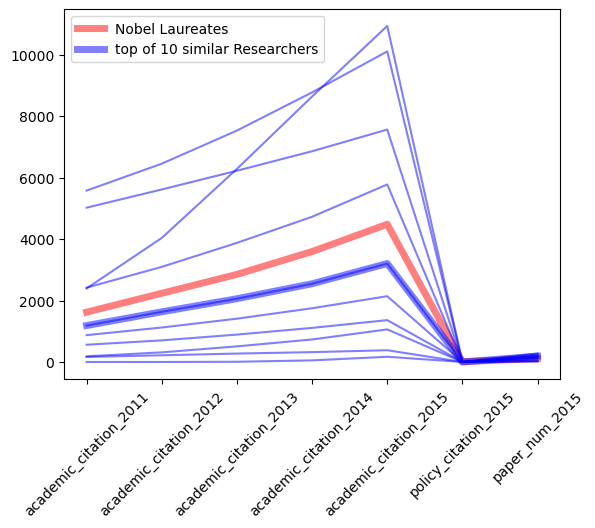

 85%|███████████████████████████████████▊      | 92/108 [00:06<00:01, 15.37it/s]

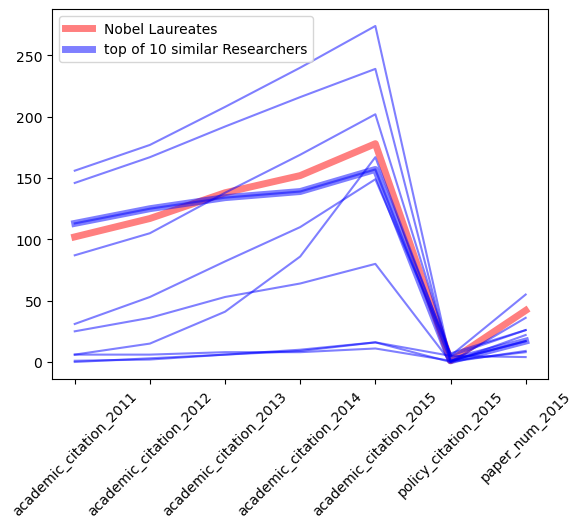

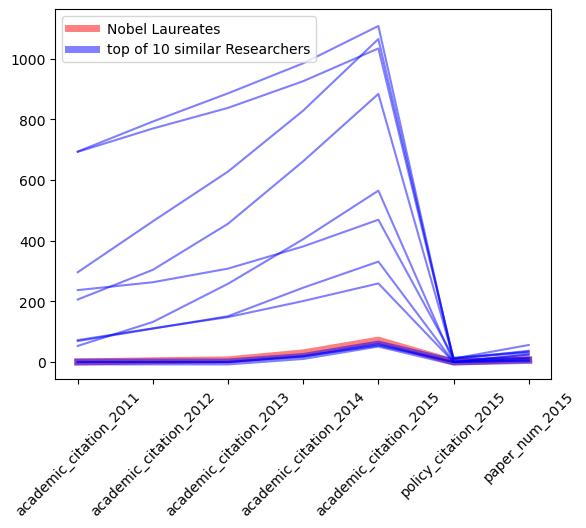

 87%|████████████████████████████████████▌     | 94/108 [00:06<00:00, 14.44it/s]

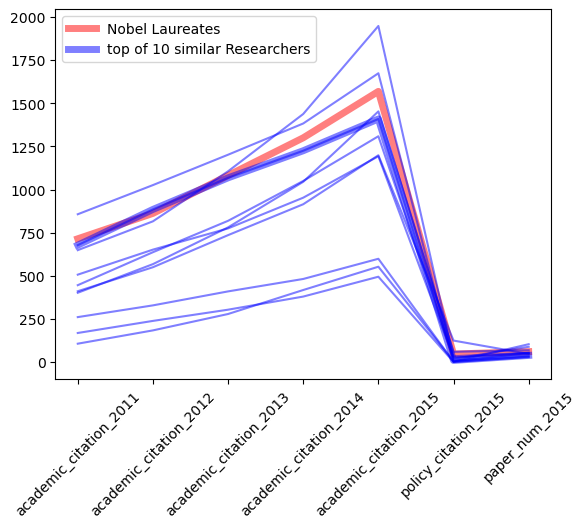

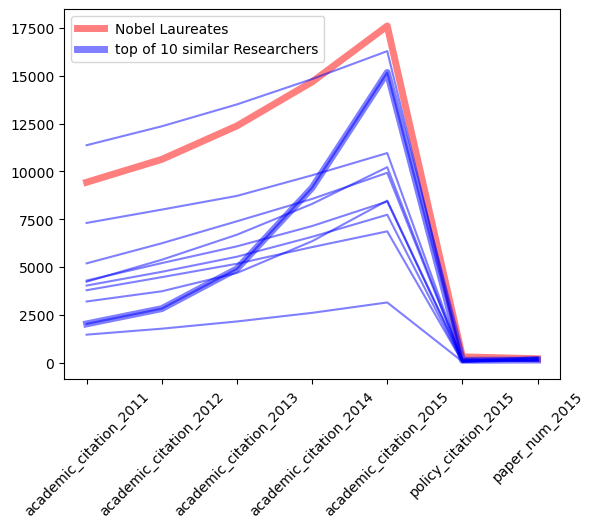

 89%|█████████████████████████████████████▎    | 96/108 [00:07<00:00, 13.95it/s]

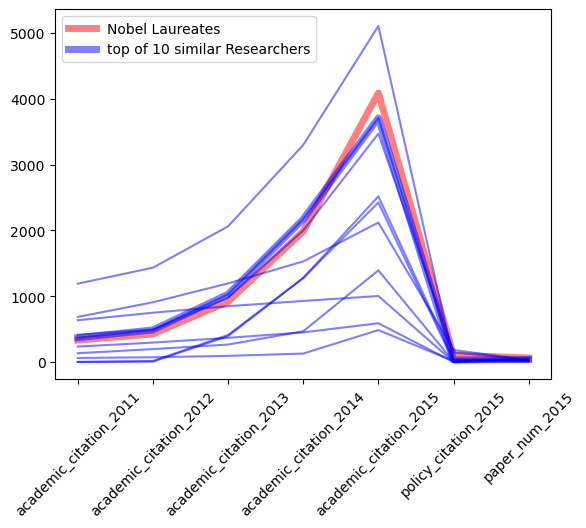

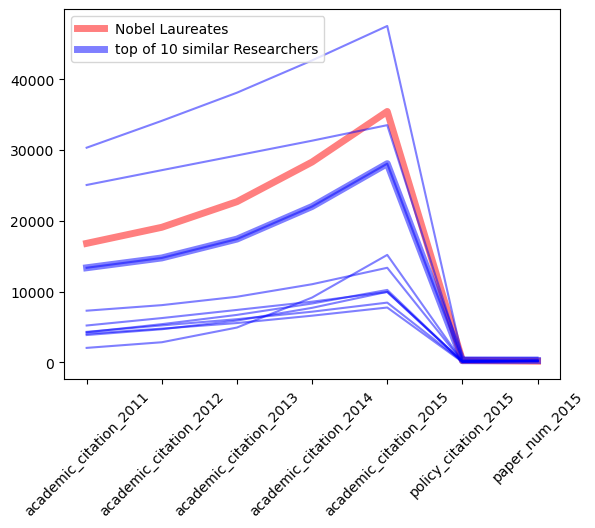

 91%|██████████████████████████████████████    | 98/108 [00:07<00:00, 13.70it/s]

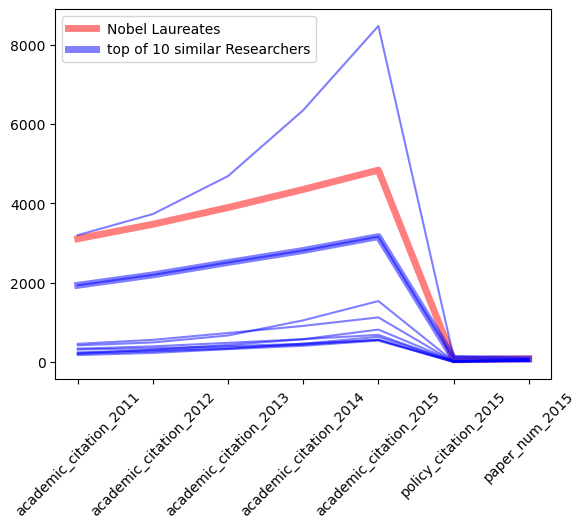

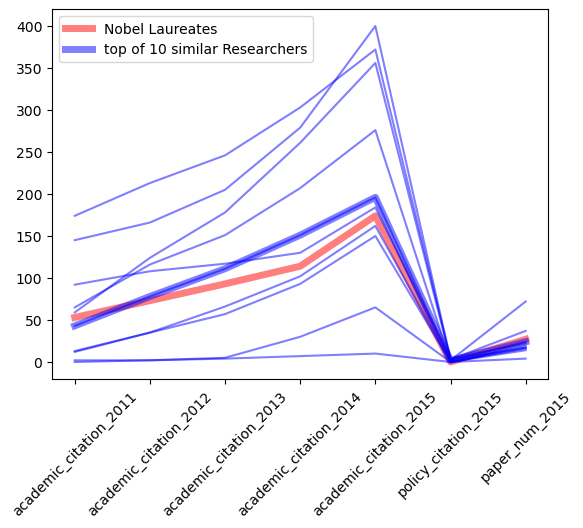

 93%|█████████████████████████████████████▉   | 100/108 [00:07<00:00, 13.60it/s]

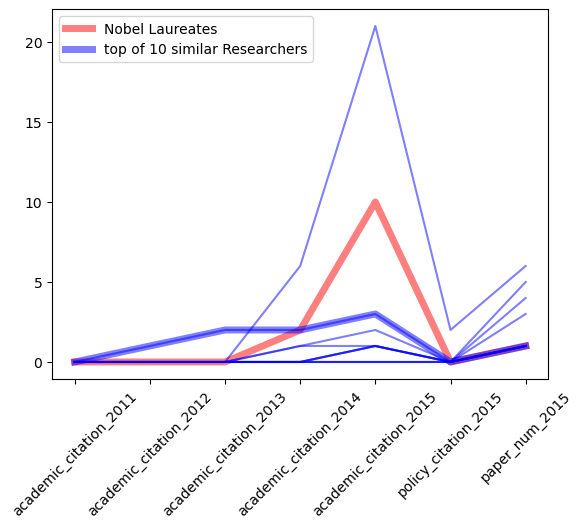

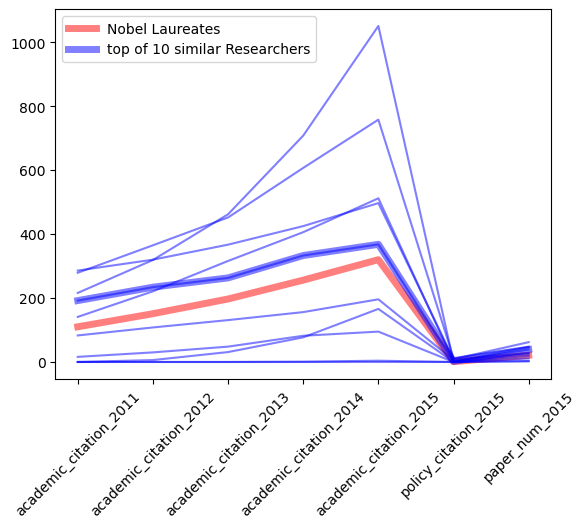

 94%|██████████████████████████████████████▋  | 102/108 [00:07<00:00, 13.70it/s]

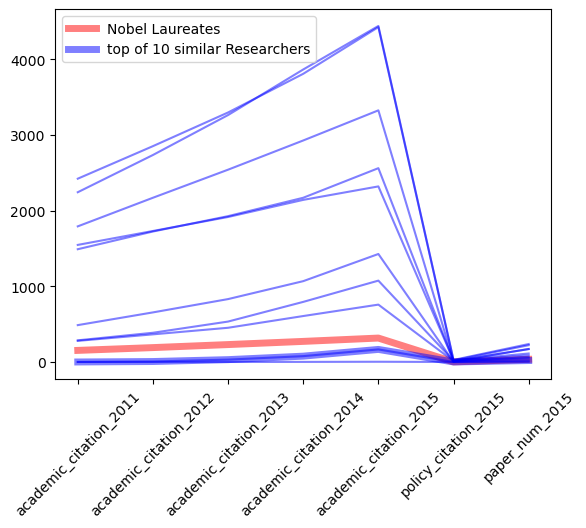

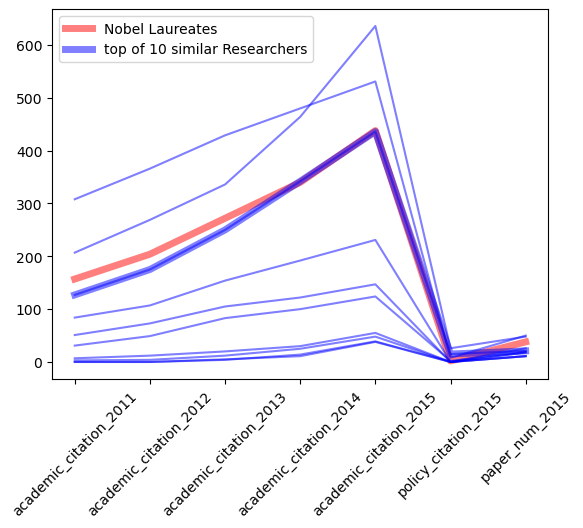

 97%|███████████████████████████████████████▊ | 105/108 [00:07<00:00, 15.73it/s]

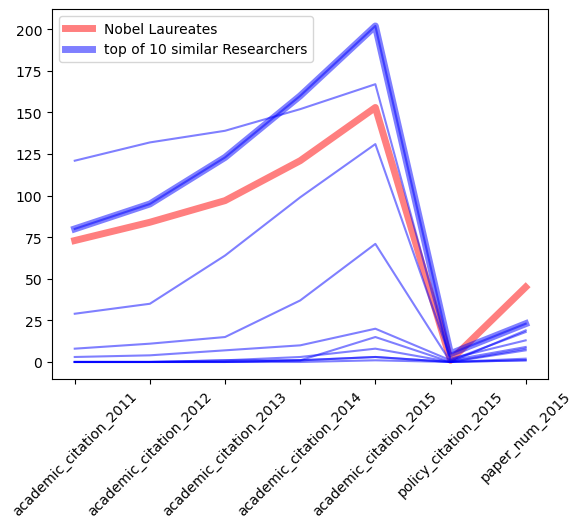

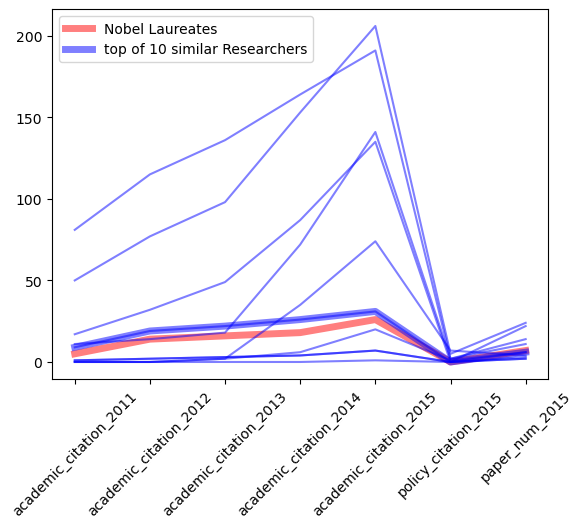

 99%|████████████████████████████████████████▌| 107/108 [00:07<00:00, 15.03it/s]

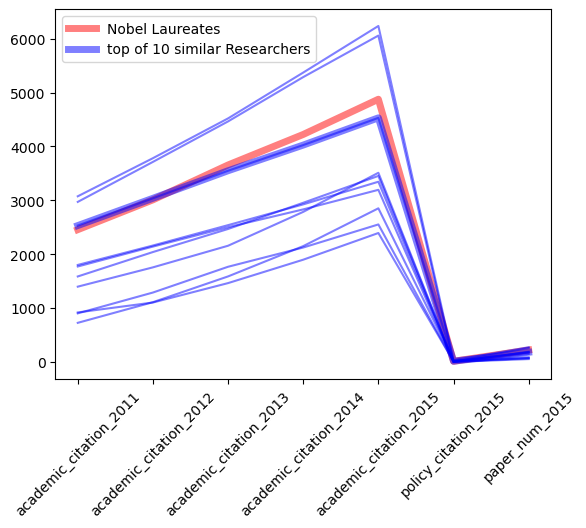

100%|█████████████████████████████████████████| 108/108 [00:07<00:00, 13.62it/s]


In [58]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cdist




# ガイドライン策定研究者を抽出
guideline_researchers = treatment_authids


# 結果を格納するリスト
matched_control_candidate_group = {}

matched_control_group = []

used_treatment_authids = []

for guideline_researcher in tqdm(treatment_authids):

    if guideline_researcher in top_k_similar_authids_dict.keys():

        used_treatment_authids.append(guideline_researcher)
    
        top_n_candidate_authid = top_k_similar_authids_dict[guideline_researcher]
        candidate_researcher = list(top_n_candidate_authid)+list([guideline_researcher])
    
        # 対照群候補で時系列での類似度を計算
        yearly_num_cited_df = candidate_feature_value[candidate_feature_value.index.isin(candidate_researcher)]
        
        
        treat_citation_history = yearly_num_cited_df[yearly_num_cited_df.index==guideline_researcher][[f'academic_citation_{i}' for i in range(2011,2016)]+['policy_citation_2015','paper_num_2015']]
        treat_citation_history = treat_citation_history.astype(float)
        
        control_candidate_citation_history = yearly_num_cited_df.loc[top_n_candidate_authid][[f'academic_citation_{i}' for i in range(2011,2016)]+['policy_citation_2015','paper_num_2015']]
        control_candidate_citation_history = control_candidate_citation_history.astype(float)
        
        treat_citation_history_series = treat_citation_history.loc[guideline_researcher].tolist()
        diff = control_candidate_citation_history.sub(treat_citation_history_series, axis='columns') #academic_citation_2011-2015とpolicy_citation_2015で平均二乗誤差
        mse = np.sqrt((diff**2).sum(axis=1))
        
        n = 10 # 似ている著者を10人取得する
        similar = mse.sort_values(ascending=True)[0:n].index.values
    
        for index, candidate in enumerate(list(similar)):
            if candidate not in matched_control_group:
                matched_control_group.append(candidate)
                break
                
            
      
        plt.plot(yearly_num_cited_df.loc[guideline_researcher,['academic_citation_2011','academic_citation_2012','academic_citation_2013','academic_citation_2014','academic_citation_2015','policy_citation_2015','paper_num_2015']], color="r", linewidth=5,alpha=0.5, label="Nobel Laureates")
        
        for i in list(similar):
            plt.plot(yearly_num_cited_df.loc[i,['academic_citation_2011','academic_citation_2012','academic_citation_2013','academic_citation_2014','academic_citation_2015','policy_citation_2015','paper_num_2015']], color="b",alpha=0.5)
        plt.plot(yearly_num_cited_df.loc[list(similar)[index],['academic_citation_2011','academic_citation_2012','academic_citation_2013','academic_citation_2014','academic_citation_2015','policy_citation_2015','paper_num_2015']], color="b",alpha=0.5,linewidth=5, label=f"top of {n} similar Researchers")
        
        plt.xticks(rotation=45)
        plt.legend()
        plt.show()
    else:
        continue


In [50]:
yearly_num_cited_df

paper_num_2015  academic_citation_2011  academic_citation_2012  \
authids                                                                       
8858824900             32.0                   168.0                   221.0   
22836266000            24.0                   142.0                   189.0   
7003378870             72.0                  1773.0                  2142.0   
7003568845            192.0                  1588.0                  2041.0   
7003711284            182.0                  2532.0                  3038.0   
7004580975            373.0                 11034.0                 13022.0   
7005575160            224.0                  2456.0                  3009.0   
6603541603             84.0                   130.0                   182.0   
7006945011            275.0                  3075.0                  3782.0   
7006975012             62.0                     1.0                     1.0   
16136024800           182.0                   921.0                  1105.0   
57224961717           262.0                  2971.0                  3713.0   
55756990600            74.0                  1802.0                  2162.0   
55489407700            12.0                    45.0                    54.0   
8382148900             77.0                   368.0                   576.0   
55628530729           240.0                  4979.0                  6328.0   
8518459100             91.0                   728.0                  1111.0   
24359010500           343.0                 17528.0                 19233.0   
8397857500             56.0                  1399.0                  1757.0   
8579349500             27.0                   154.0                   210.0   
6701350568            151.0                   904.0                  1290.0   

             academic_citation_2013  academic_citation_2014  \
authids                                                       
8858824900                    287.0                   335.0   
22836266000                   234.0                   297.0   
7003378870                   2502.0                  2832.0   
7003568845                   2469.0                  2955.0   
7003711284                   3549.0                  4025.0   
7004580975                  15052.0                 17043.0   
7005575160                   3656.0                  4222.0   
6603541603                    278.0                   384.0   
7006945011                   4520.0                  5370.0   
7006975012                      3.0                    21.0   
16136024800                  1465.0                  1899.0   
57224961717                  4464.0                  5286.0   
55756990600                  2540.0                  2925.0   
55489407700                    75.0                   126.0   
8382148900                    840.0                  1162.0   
55628530729                  7803.0                  9457.0   
8518459100                   1589.0                  2151.0   
24359010500                 20970.0                 22763.0   
8397857500                   2158.0                  2786.0   
8579349500                    300.0                   389.0   
6701350568                   1768.0                  2125.0   

             academic_citation_2015  academic_citation_2016  \
authids                                                       
8858824900                    407.0                   480.0   
22836266000                   362.0                   468.0   
7003378870                   3195.0                  3537.0   
7003568845                   3453.0                  3957.0   
7003711284                   4530.0                  4972.0   
7004580975                  19210.0                 21613.0   
7005575160                   4875.0                  5608.0   
6603541603                    547.0                   753.0   
7006945011                   6234.0                  7186.0   
7006975012                     80.0                 

In [100]:
matched_data = pd.DataFrame()

treatment_data = candidate_feature_value[candidate_feature_value.index.isin(used_treatment_authids)]
control_data = candidate_feature_value[candidate_feature_value.index.isin(matched_control_group)]

matched_data = pd.concat([treatment_data, control_data])

matched_data['guideline_member'] = 0
matched_data.loc[matched_data.index.isin(used_treatment_authids), 'guideline_member'] = 1

In [101]:
matched_data

paper_num_2015  academic_citation_2011  academic_citation_2012  \
authids                                                                       
35168055500            23.0                   108.0                   165.0   
8729078200            112.0                  1621.0                  2235.0   
10339863000            21.0                   110.0                   151.0   
55437181900            85.0                  3110.0                  3475.0   
35579376100            35.0                   153.0                   190.0   
...                     ...                     ...                     ...   
56230769900             1.0                     0.0                     0.0   
56366081900             4.0                     0.0                     0.0   
36771346500            38.0                   113.0                   177.0   
37041233800             7.0                    20.0                    81.0   
15030116800            11.0                    15.0                    20.0   

             academic_citation_2013  academic_citation_2014  \
authids                                                       
35168055500                   236.0                   326.0   
8729078200                   2850.0                  3593.0   
10339863000                   197.0                   256.0   
55437181900                  3896.0                  4352.0   
35579376100                   230.0                   272.0   
...                             ...                     ...   
56230769900                     0.0                     1.0   
56366081900                     1.0                     4.0   
36771346500                   257.0                   354.0   
37041233800                   154.0                   191.0   
15030116800                    35.0                    56.0   

             academic_citation_2015  academic_citation_2016  \
authids                                                       
35168055500                   490.0                   666.0   
8729078200                   4481.0                  5611.0   
10339863000                   320.0                   400.0   
55437181900                  4840.0                  5393.0   
35579376100                   316.0                   367.0   
...                             ...                     ...   
56230769900                     1.0                     1.0   
56366081900                    10.0                    19.0   
36771346500                   476.0                   651.0   
37041233800                   242.0                   298.0   
15030116800                    91.0                   150.0   

             academic_citation_2017  academic_citation_2018  \
authids                                                       
35168055500                   829.0                  1049.0   
8729078200                   6924.0                  8717.0   
10339863000                   508.0                   625.0   
55437181900                  5974.0                  6594.0   
35579376100                   452.0                   550.0   
...                             ...                     ...   
56230769900                     1.0                     1.0   
56366081900                    66.0                   146.0   
36771346500                   947.0                  1383.0   
37041233800                   349.0                   420.0   
15030116800                   227.0                   298.0   

             academic_citation_2019  ...  policy_citation_2015  \
authids                              ...                         
35168055500                  1330.0  ...                   1.0   
8729078200                  10609.0  ...                   8.0   
10339863000                   750.0  ...                   1.0   
55437181900                  7217.0  ...                  57.0   
35579376100                   668.0  ...                   1.0   
...                             ...  ...                   ... 

In [105]:
# matched_data.to_pickle('/disks/qnap3/users/21-tomokiyo/masters_thesis/data/guideline_paper/all_guideline_matching/matched_data.pickle')

202

## 結果の検証

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind, sem
import scipy.stats as stats


def ttest(column_name):

    control = matched_data[matched_data['guideline_member'] == 0][column_name]
    treat = matched_data[matched_data['guideline_member'] == 1][column_name]

    control = np.log10(control+1)
    treat = np.log10(treat+1)
    
    # 1. 正規性の確認（Shapiro-Wilk検定）
    treat_normality = stats.shapiro(treat)
    control_normality = stats.shapiro(control)
    
    print("Treatment group Shapiro-Wilk test: W =", treat_normality.statistic, ", p-value =", treat_normality.pvalue)
    print("Control group Shapiro-Wilk test: W =", control_normality.statistic, ", p-value =", control_normality.pvalue)
    
    if treat_normality.pvalue < 0.05 or control_normality.pvalue < 0.05:
        print("データが正規分布ではない可能性があります。非パラメトリック検定を検討してください。")
    
    # 2. 分散の等質性の確認（F検定）
    levene_test = stats.levene(treat, control)
    print("Levene's test for equal variances: W =", levene_test.statistic, ", p-value =", levene_test.pvalue)
    
    # 分散の等質性を仮定するか否かでt検定を選択
    equal_var = levene_test.pvalue > 0.05
    
    # 3. t検定の実行
    t_test_result = stats.ttest_ind(treat, control, equal_var=equal_var)
    print("t-test result: t =", t_test_result.statistic, ", p-value =", t_test_result.pvalue)
    
    # 結果の解釈
    if t_test_result.pvalue < 0.05:
        print("有意差があります（p < 0.05）。")
    else:
        print("有意差はありません（p >= 0.05）。")
    
    # 4. 非正規性が疑われる場合は非パラメトリック検定を実施
    if treat_normality.pvalue < 0.05 or control_normality.pvalue < 0.05:
        mannwhitney_result = stats.mannwhitneyu(treat, control, alternative='greater')
        print("Mann-Whitney U test: U =", mannwhitney_result.statistic, ", p-value =", mannwhitney_result.pvalue)
        if mannwhitney_result.pvalue < 0.05:
            print("非パラメトリック検定でも有意差があります（p < 0.05）。")
        else:
            print("非パラメトリック検定では有意差はありません（p >= 0.05）。")

In [89]:
column_name_ls = ["academic_citation_2011","academic_citation_2012","academic_citation_2013","academic_citation_2014","academic_citation_2015","policy_citation_2015","paper_num_2015"]
                  
for column_name in column_name_ls:
    print(column_name)
    ttest(column_name)
    print()

academic_citation_2011
Treatment group Shapiro-Wilk test: W = 0.9454183967362751 , p-value = 0.00038963605554994074
Control group Shapiro-Wilk test: W = 0.9274321525492274 , p-value = 3.272515569768117e-05
データが正規分布ではない可能性があります。非パラメトリック検定を検討してください。
Levene's test for equal variances: W = 0.8909932780420569 , p-value = 0.3463471625808763
t-test result: t = 0.7442894765645716 , p-value = 0.4575749586778066
有意差はありません（p >= 0.05）。
Mann-Whitney U test: U = 5334.0 , p-value = 0.2872070422496049
非パラメトリック検定では有意差はありません（p >= 0.05）。

academic_citation_2012
Treatment group Shapiro-Wilk test: W = 0.9403639054567373 , p-value = 0.00018782179679797319
Control group Shapiro-Wilk test: W = 0.9414455515547873 , p-value = 0.00021904863507893807
データが正規分布ではない可能性があります。非パラメトリック検定を検討してください。
Levene's test for equal variances: W = 0.3946182098946824 , p-value = 0.5305984817229277
t-test result: t = 0.5640961780598348 , p-value = 0.5733206981192398
有意差はありません（p >= 0.05）。
Mann-Whitney U test: U = 5282.5 , p-value = 0

In [90]:
column_name_ls = ["academic_citation_2016","academic_citation_2017","academic_citation_2018","academic_citation_2019","academic_citation_2020","academic_citation_2021","academic_citation_2022","academic_citation_2023"]
                  
for column_name in column_name_ls:
    print(column_name)
    ttest(column_name)
    print()

academic_citation_2016
Treatment group Shapiro-Wilk test: W = 0.9689120120028044 , p-value = 0.01739877005300547
Control group Shapiro-Wilk test: W = 0.9604433053264518 , p-value = 0.004079316197912268
データが正規分布ではない可能性があります。非パラメトリック検定を検討してください。
Levene's test for equal variances: W = 0.000793871041672461 , p-value = 0.9775500990441409
t-test result: t = 0.5134100500757837 , p-value = 0.6082312012554184
有意差はありません（p >= 0.05）。
Mann-Whitney U test: U = 5295.5 , p-value = 0.3198163605958998
非パラメトリック検定では有意差はありません（p >= 0.05）。

academic_citation_2017
Treatment group Shapiro-Wilk test: W = 0.9666729744538844 , p-value = 0.011754127997435339
Control group Shapiro-Wilk test: W = 0.953708258052383 , p-value = 0.0013748574655811756
データが正規分布ではない可能性があります。非パラメトリック検定を検討してください。
Levene's test for equal variances: W = 0.004819753291421011 , p-value = 0.9447211364561614
t-test result: t = 0.6838706851811505 , p-value = 0.4948484053592498
有意差はありません（p >= 0.05）。
Mann-Whitney U test: U = 5376.0 , p-value = 0.253

In [103]:
column_name_ls = ["policy_citation_2011","policy_citation_2012","policy_citation_2013","policy_citation_2014","policy_citation_2015","policy_citation_2016","policy_citation_2017","policy_citation_2018","policy_citation_2019","policy_citation_2020","policy_citation_2021","policy_citation_2022","policy_citation_2023"]
                  
for column_name in column_name_ls:
    print(column_name)
    ttest(column_name)
    print()

policy_citation_2011
Treatment group Shapiro-Wilk test: W = 0.7777538815411251 , p-value = 4.69241453821602e-11
Control group Shapiro-Wilk test: W = 0.7423285931715016 , p-value = 5.0588597607110704e-12
データが正規分布ではない可能性があります。非パラメトリック検定を検討してください。
Levene's test for equal variances: W = 0.5978117021580027 , p-value = 0.44032703024513864
t-test result: t = 0.7731828387632531 , p-value = 0.44032703024513953
有意差はありません（p >= 0.05）。
Mann-Whitney U test: U = 5406.0 , p-value = 0.21003327231359814
非パラメトリック検定では有意差はありません（p >= 0.05）。

policy_citation_2012
Treatment group Shapiro-Wilk test: W = 0.8421198028683308 , p-value = 5.4032571066431865e-09
Control group Shapiro-Wilk test: W = 0.8104753848955875 , p-value = 4.5904054807462806e-10
データが正規分布ではない可能性があります。非パラメトリック検定を検討してください。
Levene's test for equal variances: W = 0.7651523496732541 , p-value = 0.38277011473012257
t-test result: t = 0.9175425155654233 , p-value = 0.35996355875142205
有意差はありません（p >= 0.05）。
Mann-Whitney U test: U = 5446.5 , p-value = 0

/tmp/ipykernel_615853/3052690159.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=matched_data,x="guideline_member",y="academic_citation_2022",inner="stick", palette="pastel")


<Axes: xlabel='guideline_member', ylabel='academic_citation_2022'>

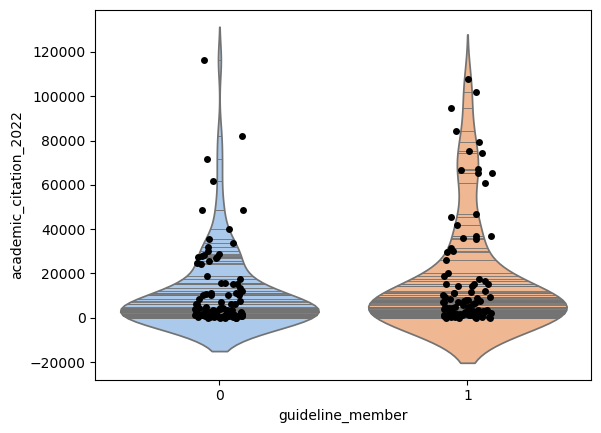

In [92]:
sns.violinplot(data=matched_data,x="guideline_member",y="academic_citation_2022",inner="stick", palette="pastel")
sns.stripplot(data=matched_data,x="guideline_member",y="academic_citation_2022",color="k")

/tmp/ipykernel_615853/442370677.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data[year] = np.log10(relevant_data[year] + 1)


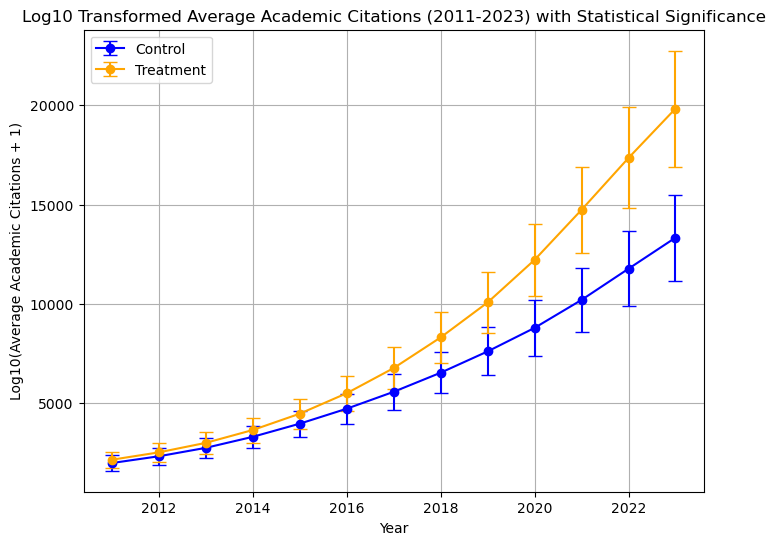

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind, sem


# Define the years for analysis
years = [f'academic_citation_{year}' for year in range(2011, 2024)]
relevant_data = matched_data[['guideline_member'] + years]


# Apply log10 transformation (log10(x + 1)) to citation data
for year in years:
    relevant_data[year] = np.log10(relevant_data[year] + 1)

# Initialize lists to store means, confidence intervals, and p-values
means_group_0 = []
means_group_1 = []
conf_ints_group_0 = []
conf_ints_group_1 = []
errors_group_0 = []
errors_group_1 = []
p_values = []

# Confidence level
conf_level = 0.95
z_value = 1.96  # for 95% confidence level

# Iterate over years to calculate statistics
for year in years:
    group_0 = matched_data[matched_data['guideline_member'] == 0][year]
    group_1 = matched_data[matched_data['guideline_member'] == 1][year]

    # Calculate means
    mean_0 = group_0.mean()
    mean_1 = group_1.mean()
    means_group_0.append(mean_0)
    means_group_1.append(mean_1)

    errors_group_0.append(group_0.sem())
    errors_group_1.append(group_1.sem())

    # Perform t-test
    _, p_value = ttest_ind(group_0, group_1, nan_policy='omit', equal_var=False)
    p_values.append(p_value)

# Plotting
x = np.arange(2011, 2024)
plt.figure(figsize=(8, 6))

# Plot group 0 with confidence intervals
plt.errorbar(
    x, means_group_0, yerr=errors_group_0, label="Control", fmt='o-', capsize=5, color='blue'
)

# Plot group 1 with confidence intervals
plt.errorbar(
    x, means_group_1, yerr=errors_group_1, label="Treatment", fmt='o-', capsize=5, color='orange'
)

# Highlight statistically significant years
for i, p in enumerate(p_values):
    if p < 0.05:  # 5% significance level
        plt.text(x[i], max(means_group_0[i], means_group_1[i]) + 0.05, '*', ha='center', color='red', fontsize=20)

plt.title("Log10 Transformed Average Academic Citations (2011-2023) with Statistical Significance")
plt.xlabel("Year")
plt.ylabel("Log10(Average Academic Citations + 1)")
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipykernel_615853/547057945.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data[year] = np.log10(relevant_data[year] + 1)


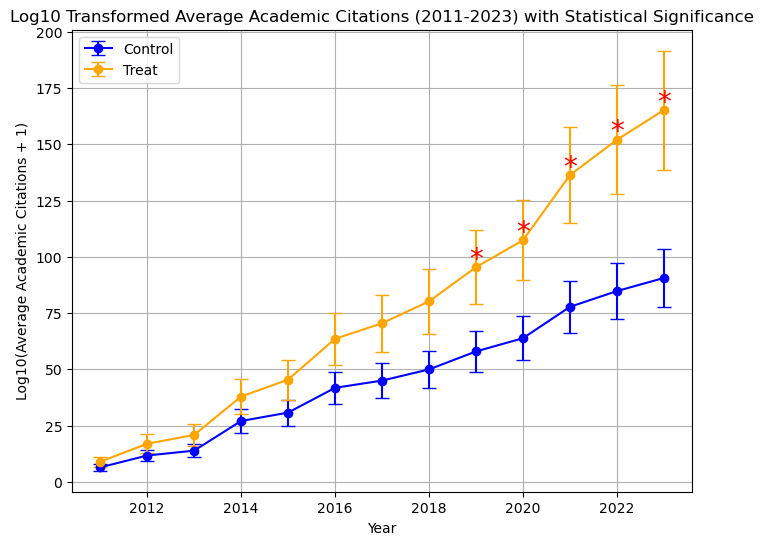

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind, sem


# Define the years for analysis
years = [f'policy_citation_{year}' for year in range(2011, 2024)]
relevant_data = matched_data[['guideline_member'] + years]


# Apply log10 transformation (log10(x + 1)) to citation data
for year in years:
    relevant_data[year] = np.log10(relevant_data[year] + 1)

# Initialize lists to store means, confidence intervals, and p-values
means_group_0 = []
means_group_1 = []
conf_ints_group_0 = []
conf_ints_group_1 = []
errors_group_0 = []
errors_group_1 = []
p_values = []

# Confidence level
conf_level = 0.95
z_value = 1.96  # for 95% confidence level

# Iterate over years to calculate statistics
for year in years:
    group_0 = matched_data[matched_data['guideline_member'] == 0][year]
    group_1 = matched_data[matched_data['guideline_member'] == 1][year]

    # Calculate means
    mean_0 = group_0.mean()
    mean_1 = group_1.mean()
    means_group_0.append(mean_0)
    means_group_1.append(mean_1)

    errors_group_0.append(group_0.sem())
    errors_group_1.append(group_1.sem())

    # Perform t-test
    _, p_value = ttest_ind(group_0, group_1, nan_policy='omit', equal_var=False)
    p_values.append(p_value)

# Plotting
x = np.arange(2011, 2024)
plt.figure(figsize=(8, 6))

# Plot group 0 with confidence intervals
plt.errorbar(
    x, means_group_0, yerr=errors_group_0, label="Control", fmt='o-', capsize=5, color='blue'
)

# Plot group 1 with confidence intervals
plt.errorbar(
    x, means_group_1, yerr=errors_group_1, label="Treatment", fmt='o-', capsize=5, color='orange'
)

# Highlight statistically significant years
for i, p in enumerate(p_values):
    if p < 0.05:  # 5% significance level
        plt.text(x[i], max(means_group_0[i], means_group_1[i]) + 0.05, '*', ha='center', color='red', fontsize=20)

plt.title("Log10 Transformed Average Academic Citations (2011-2023) with Statistical Significance")
plt.xlabel("Year")
plt.ylabel("Log10(Average Academic Citations + 1)")
plt.legend()
plt.grid(True)
plt.show()


### マッチングの中身を見てみる？